In [1]:
import pickle
from math import *
from overlap_calc import *
import csv
from collections import namedtuple
gene_overlap = pickle.load(open('ucsc_overlaps_300.pkl', 'rb'))
gene_overlap_elife = pickle.load(open('hs_elife_overlaps.pkl', 'rb'))
species = set()
o2os = { k:set() for k in gene_overlap.keys() }
ortho = namedtuple('one2one', ['lgene', 'lspecies', 'rgene', 'rspecies'])
with open('/data/db/one2one.csv') as file:
    for o in (ortho(l['gl.stable_id'], l['namel.name'], l['gr.stable_id'], l['namer.name']) for l in csv.DictReader(file, fieldnames=['gl.stable_id', 'namel.name', 'gr.stable_id', 'namer.name'], quotechar='"')):
        species.add(o.rspecies)
        if 'gene:'+o.lgene in o2os:
            o2os['gene:'+o.lgene].add(o.rspecies)
cpg_less, cpg_full = split_overlaps(gene_overlap)
cpg_less_elife, cpg_full_elife = split_overlaps(gene_overlap_elife)

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]


In [23]:
from seaborn import violinplot, despine, boxplot, barplot
from pandas import DataFrame
from matplotlib import pyplot

frame=DataFrame.from_records([(bo, len([g for g in cpg_less if bo in o2os[g]])/len(cpg_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full if bo in o2os[g]])/len(cpg_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frame=frame.sort_values("Orthologs", ascending=False)


ERROR! Session/line number was not unique in database. History logging moved to new session 224


In [22]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

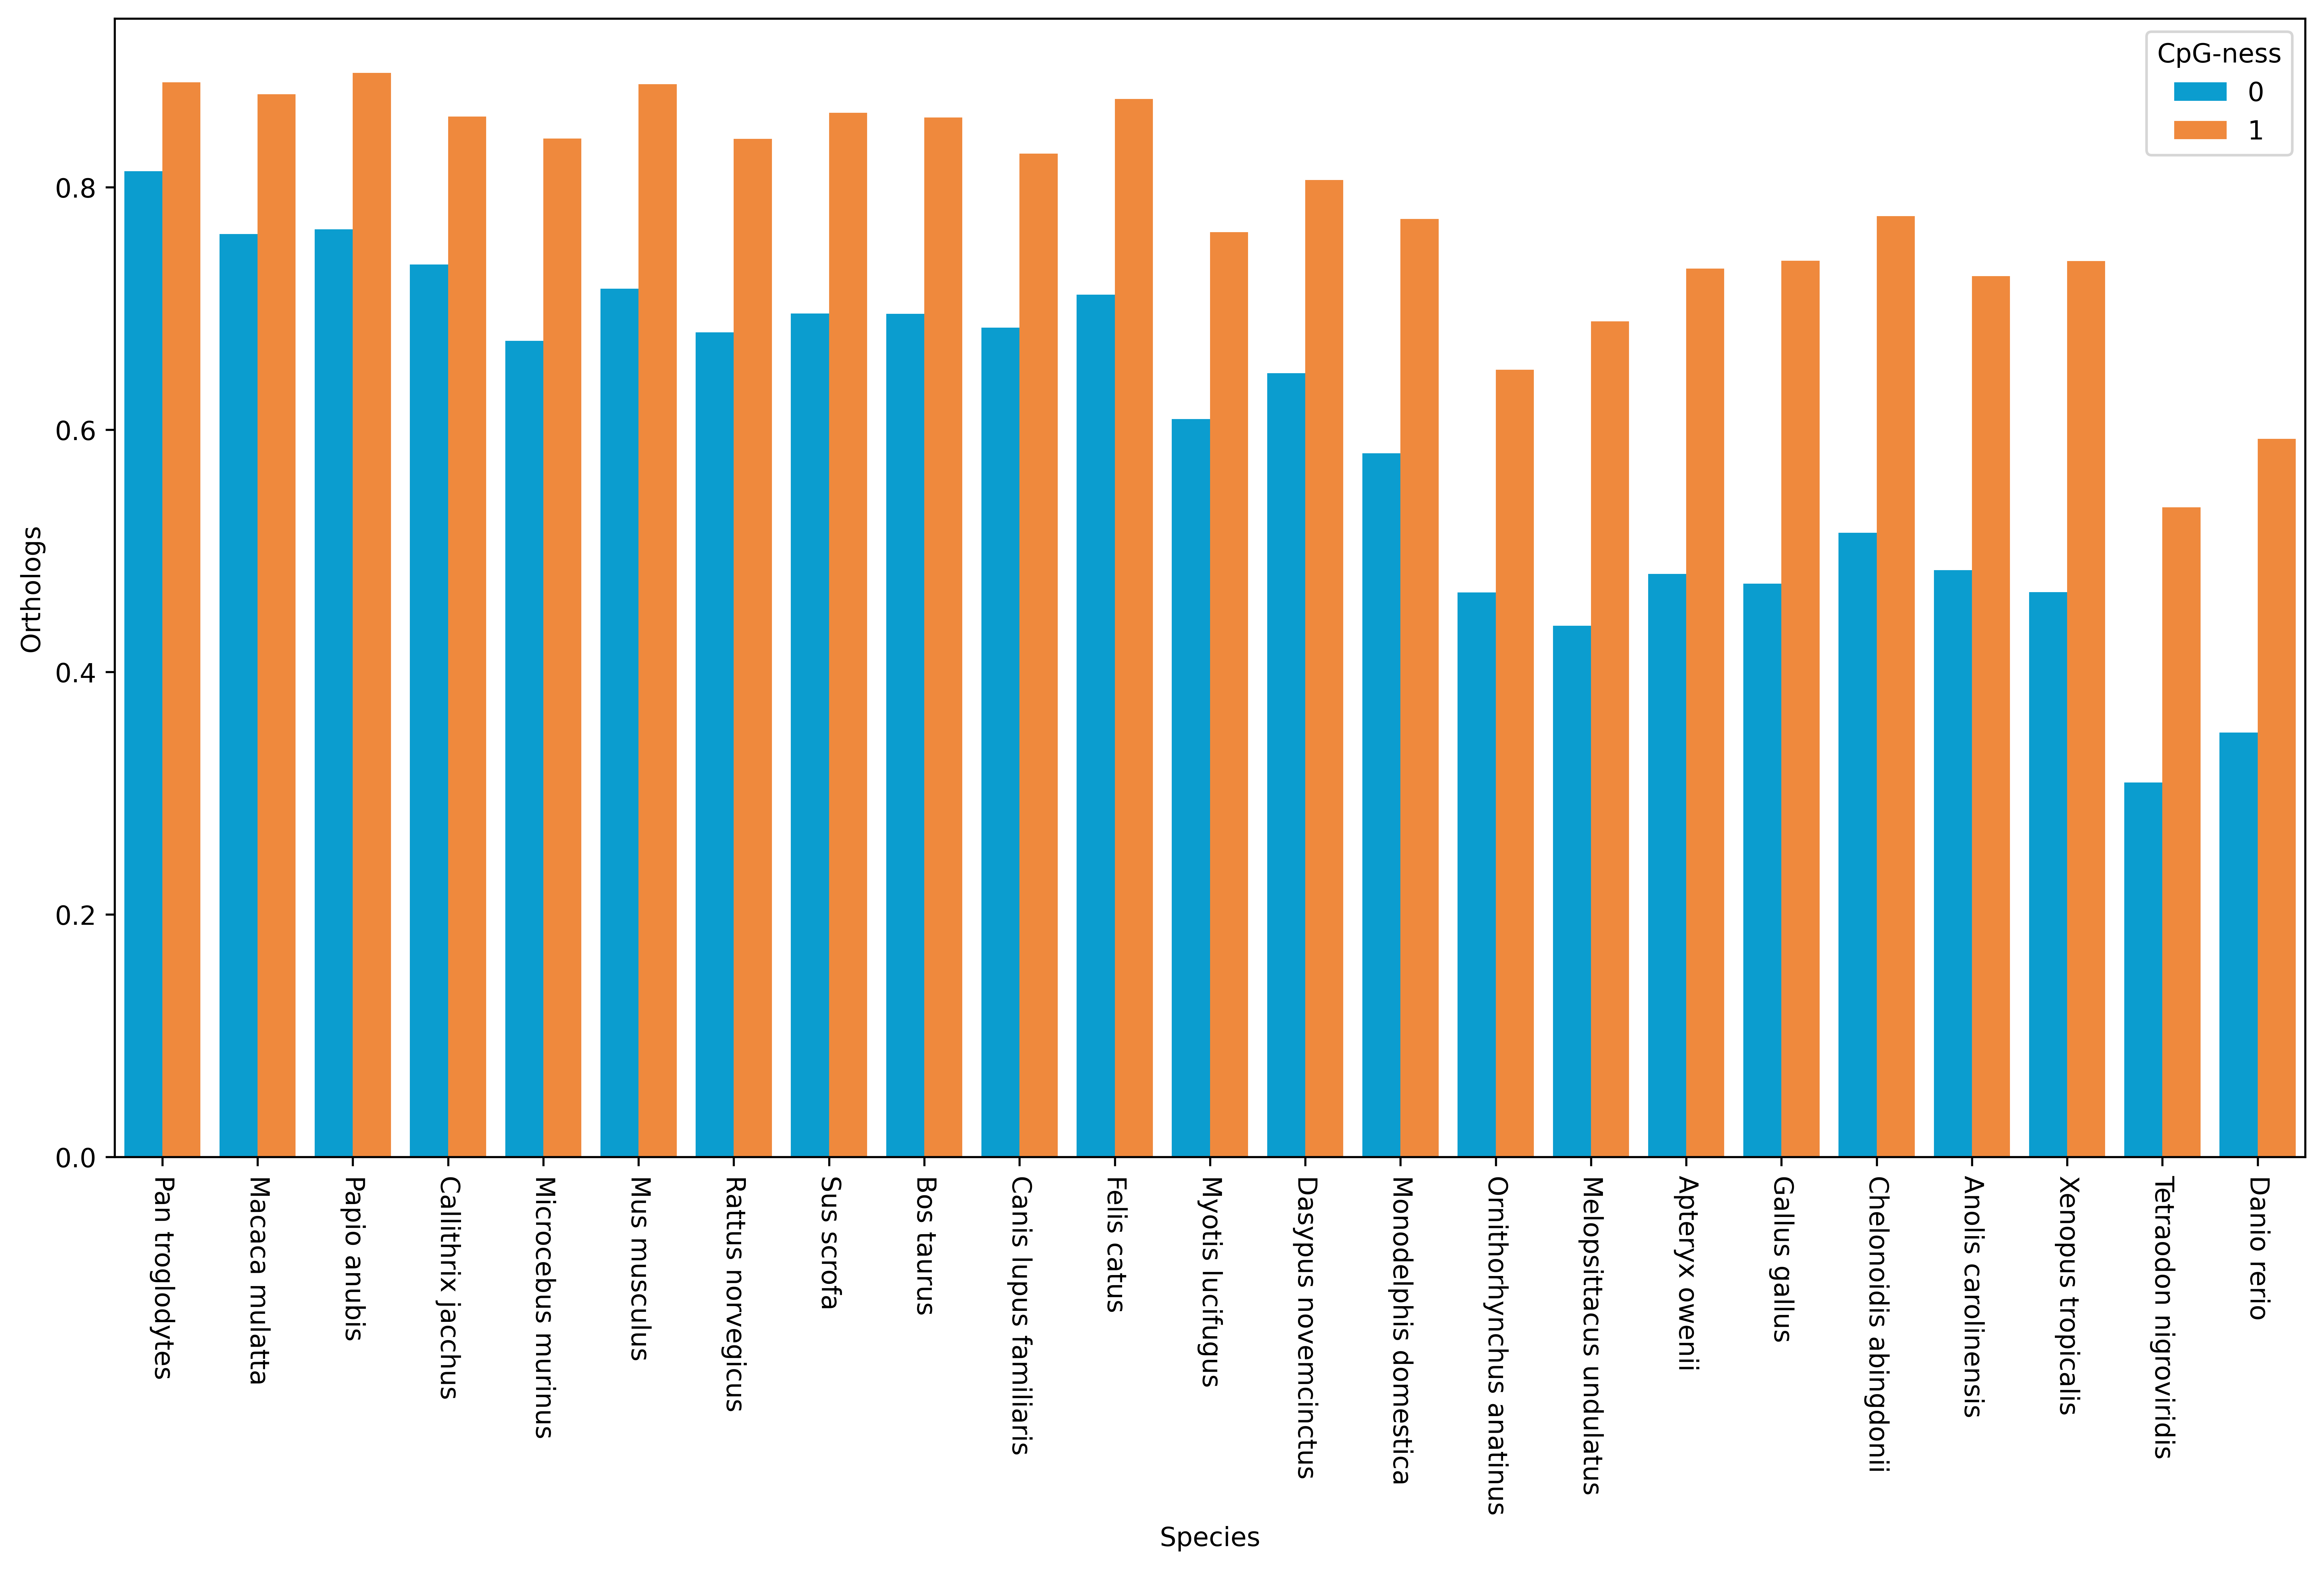

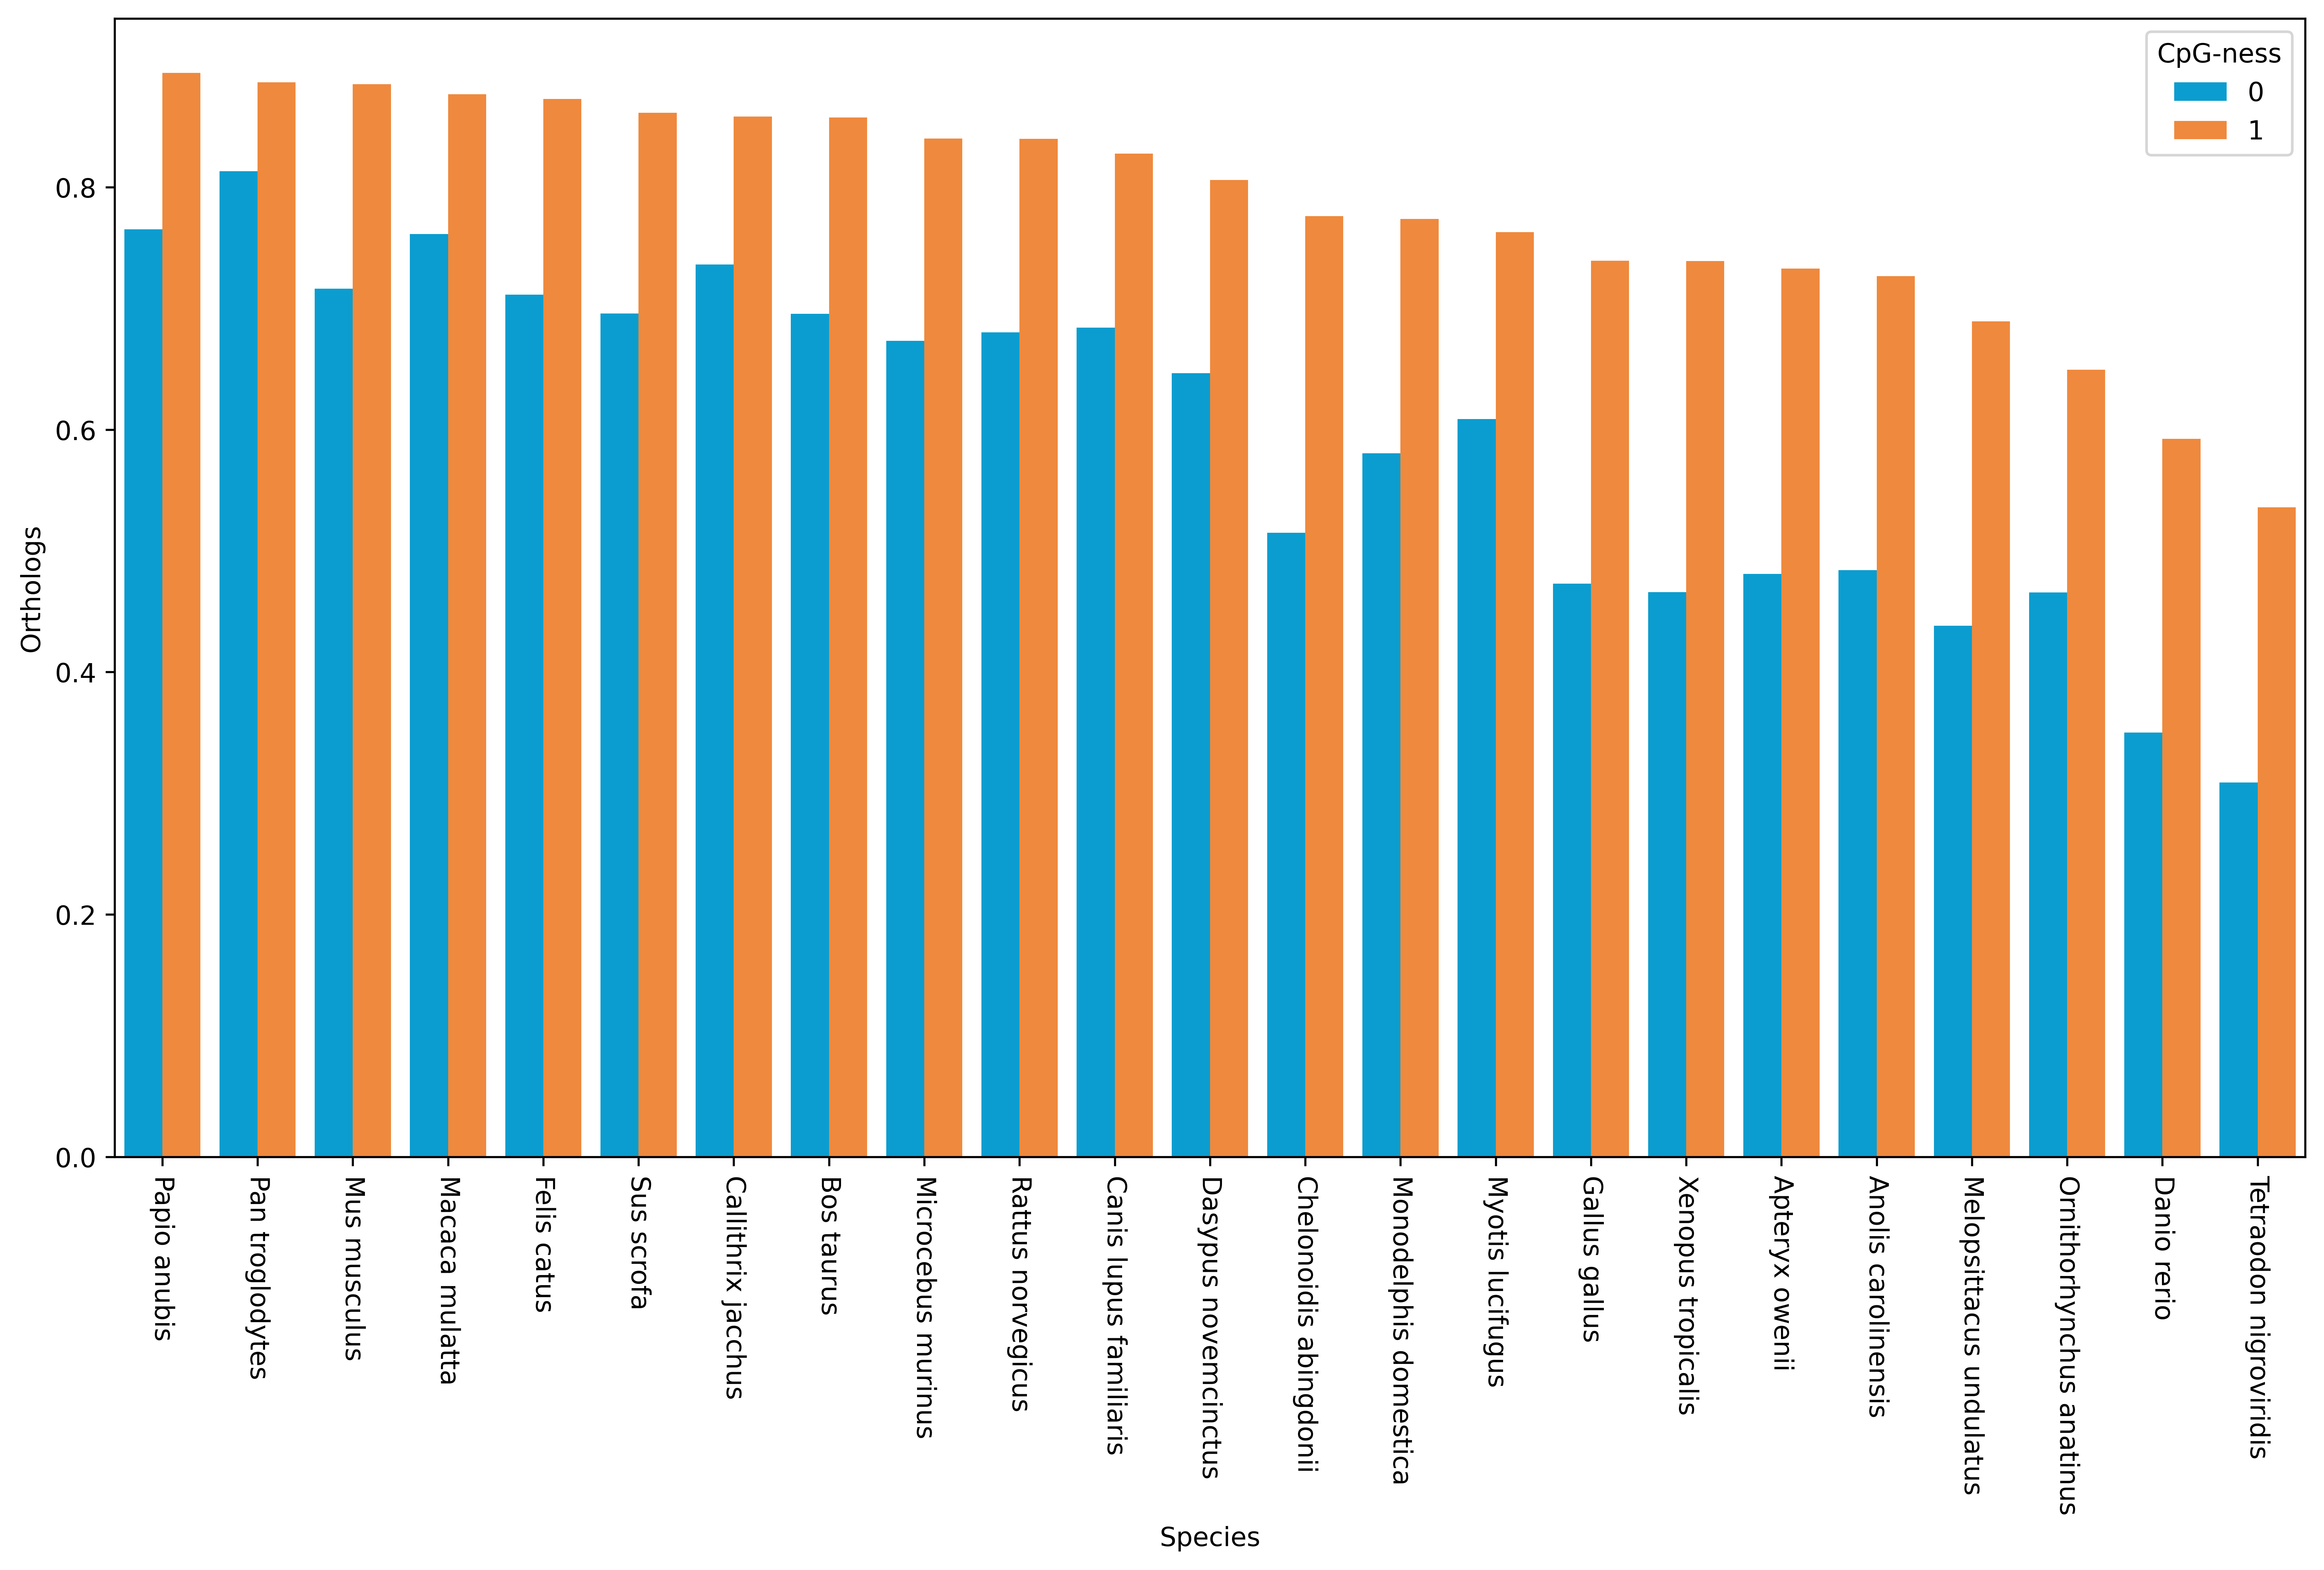

In [5]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame[frame['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame[frame['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio.pdf')

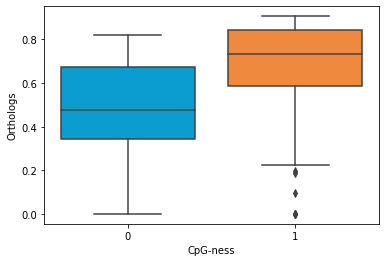

In [6]:
boxplot(data=frame, x="CpG-ness", y="Orthologs", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
pyplot.savefig('ortho-one-to-one-species-human-by-cgi-box.pdf', dpi=600)

In [7]:
import gffutils
canons = canons_by_gene(gffutils.FeatureDB('homo.db'), r'/mnt/hddata/2/evgeny/TAU/Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa')

In [8]:
from seaborn import violinplot, despine, boxplot, barplot
from pandas import DataFrame
from matplotlib import pyplot

frameo=DataFrame.from_records([(bo, len([g for g in cpg_less if bo in o2os[g]])/len(cpg_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full if bo in o2os[g]])/len(cpg_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frameo=frameo.sort_values("Orthologs", ascending=False)
frameelife=DataFrame.from_records([(bo, len([g for g in cpg_less_elife if bo in o2os[g]])/len(cpg_less_elife), 0) for bo in species]+
                             [(bo, len([g for g in cpg_full_elife if bo in o2os[g]])/len(cpg_full_elife), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frameelife=frameelife.sort_values("Orthologs", ascending=False)


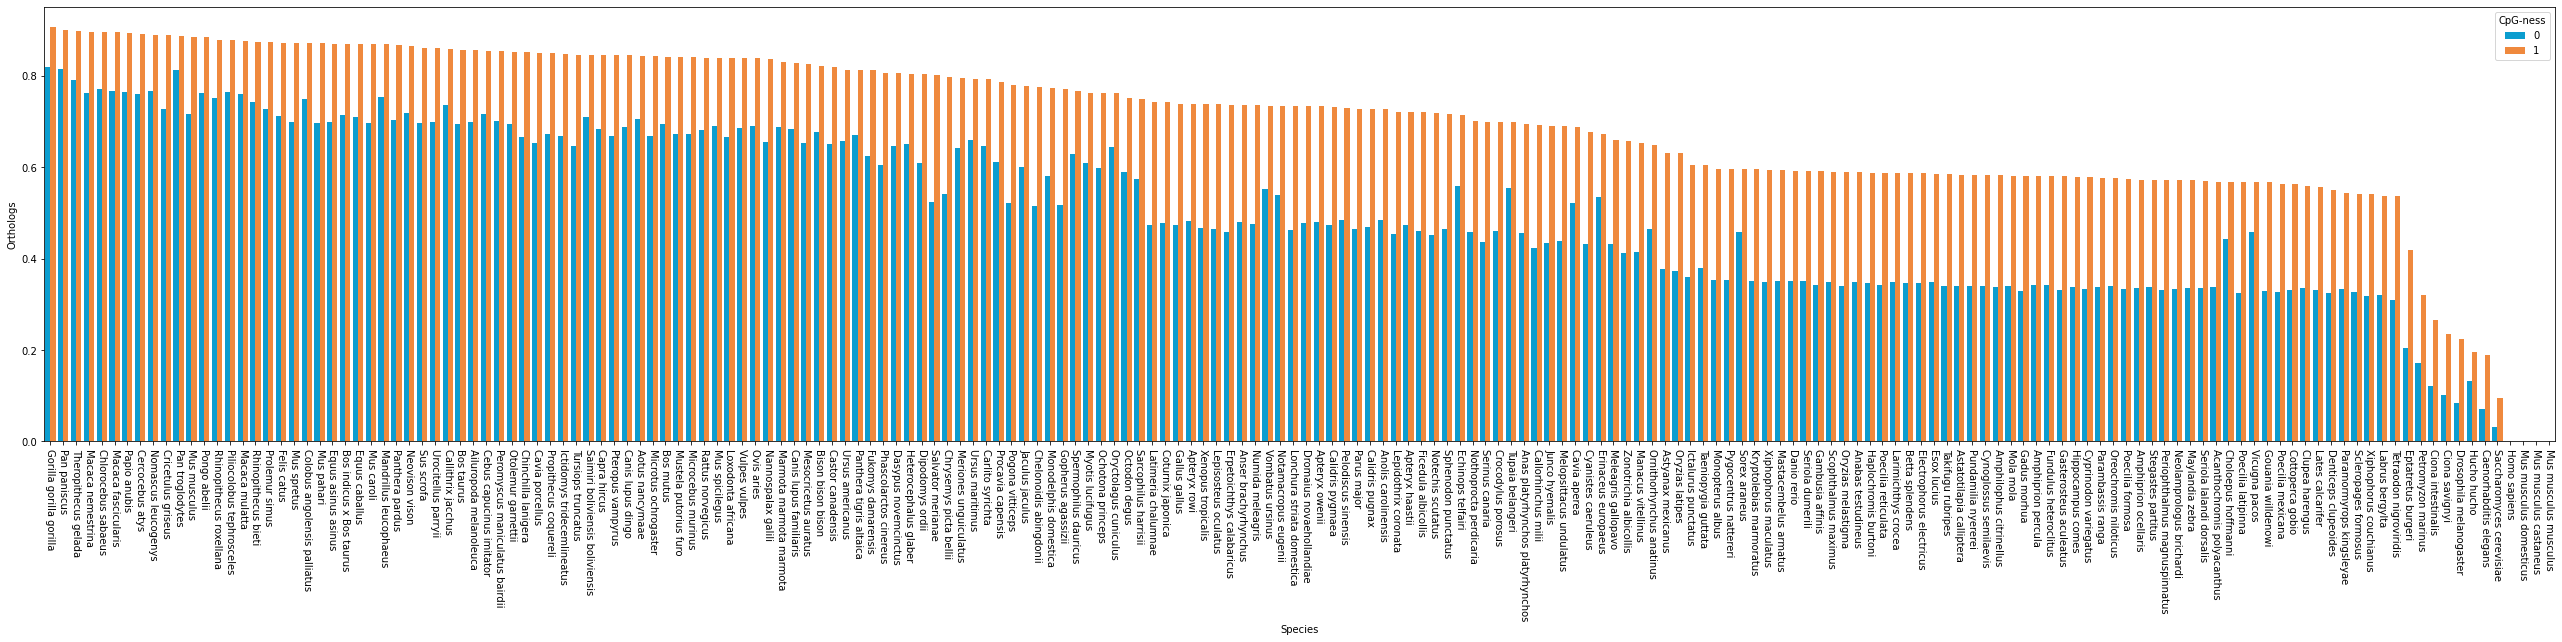

In [36]:
fig, ax = pyplot.subplots(figsize=(45,8))
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=frameo, x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-bars.pdf')

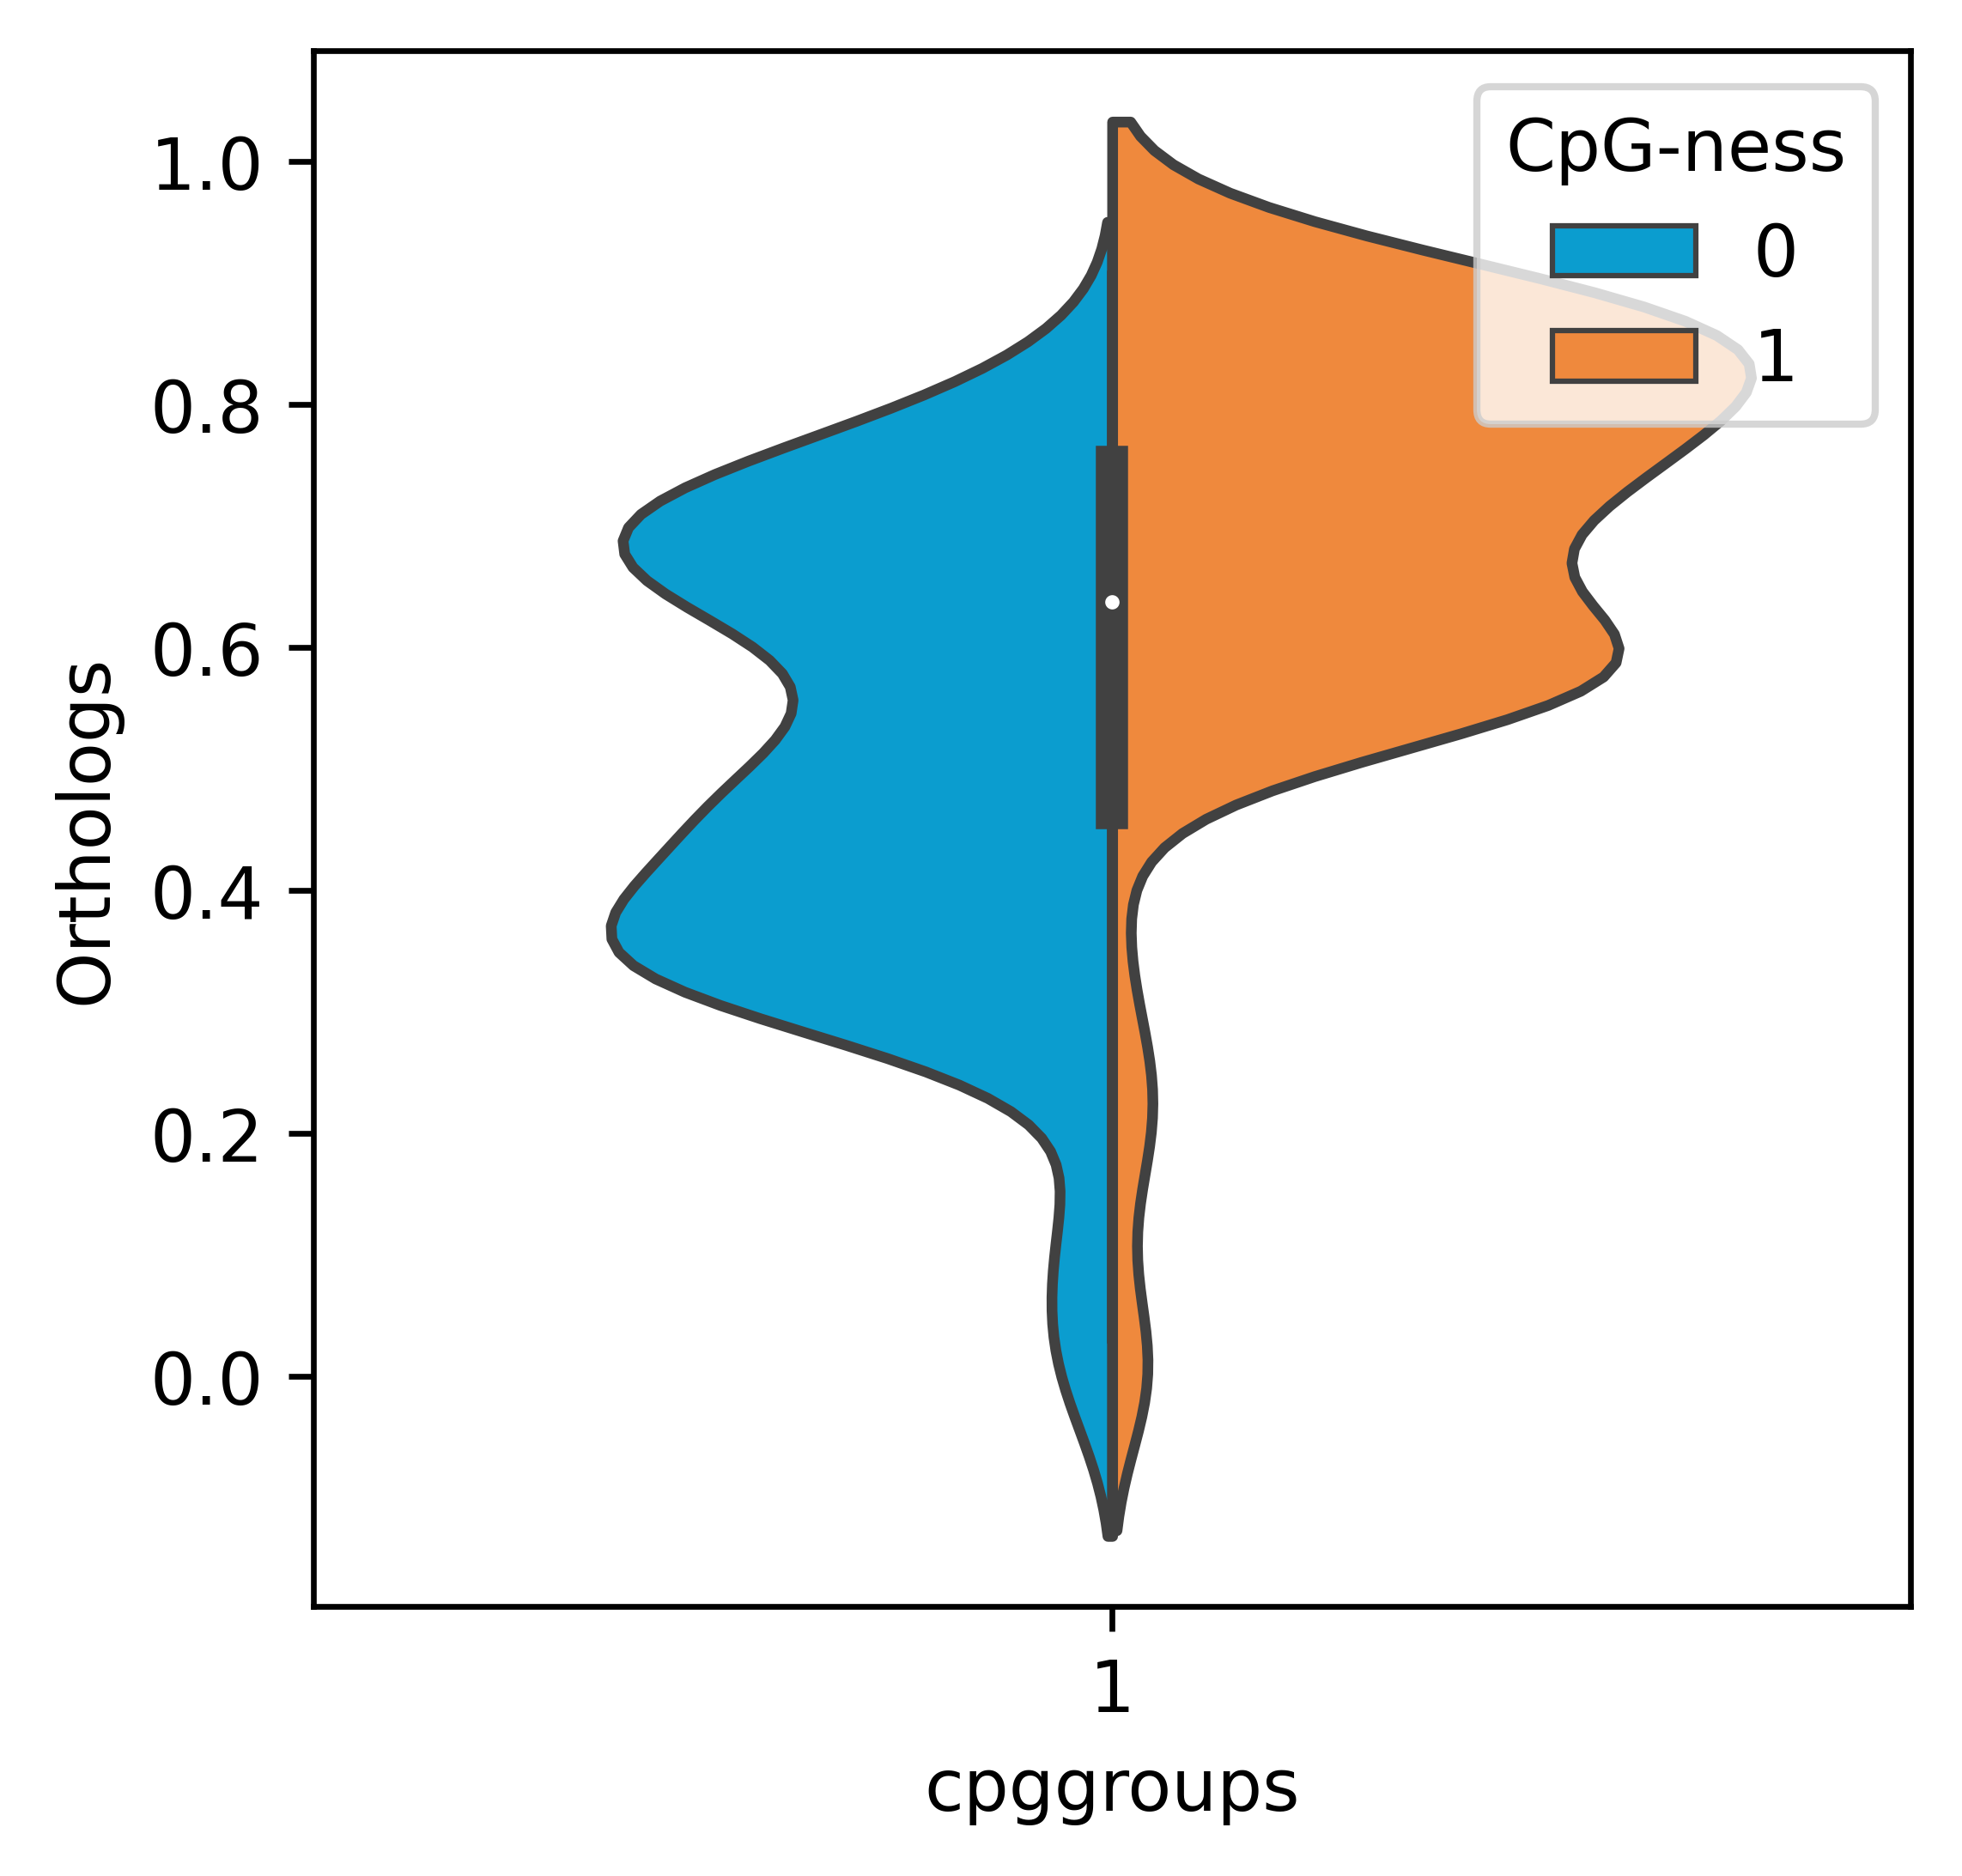

In [37]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frameo.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin.pdf')

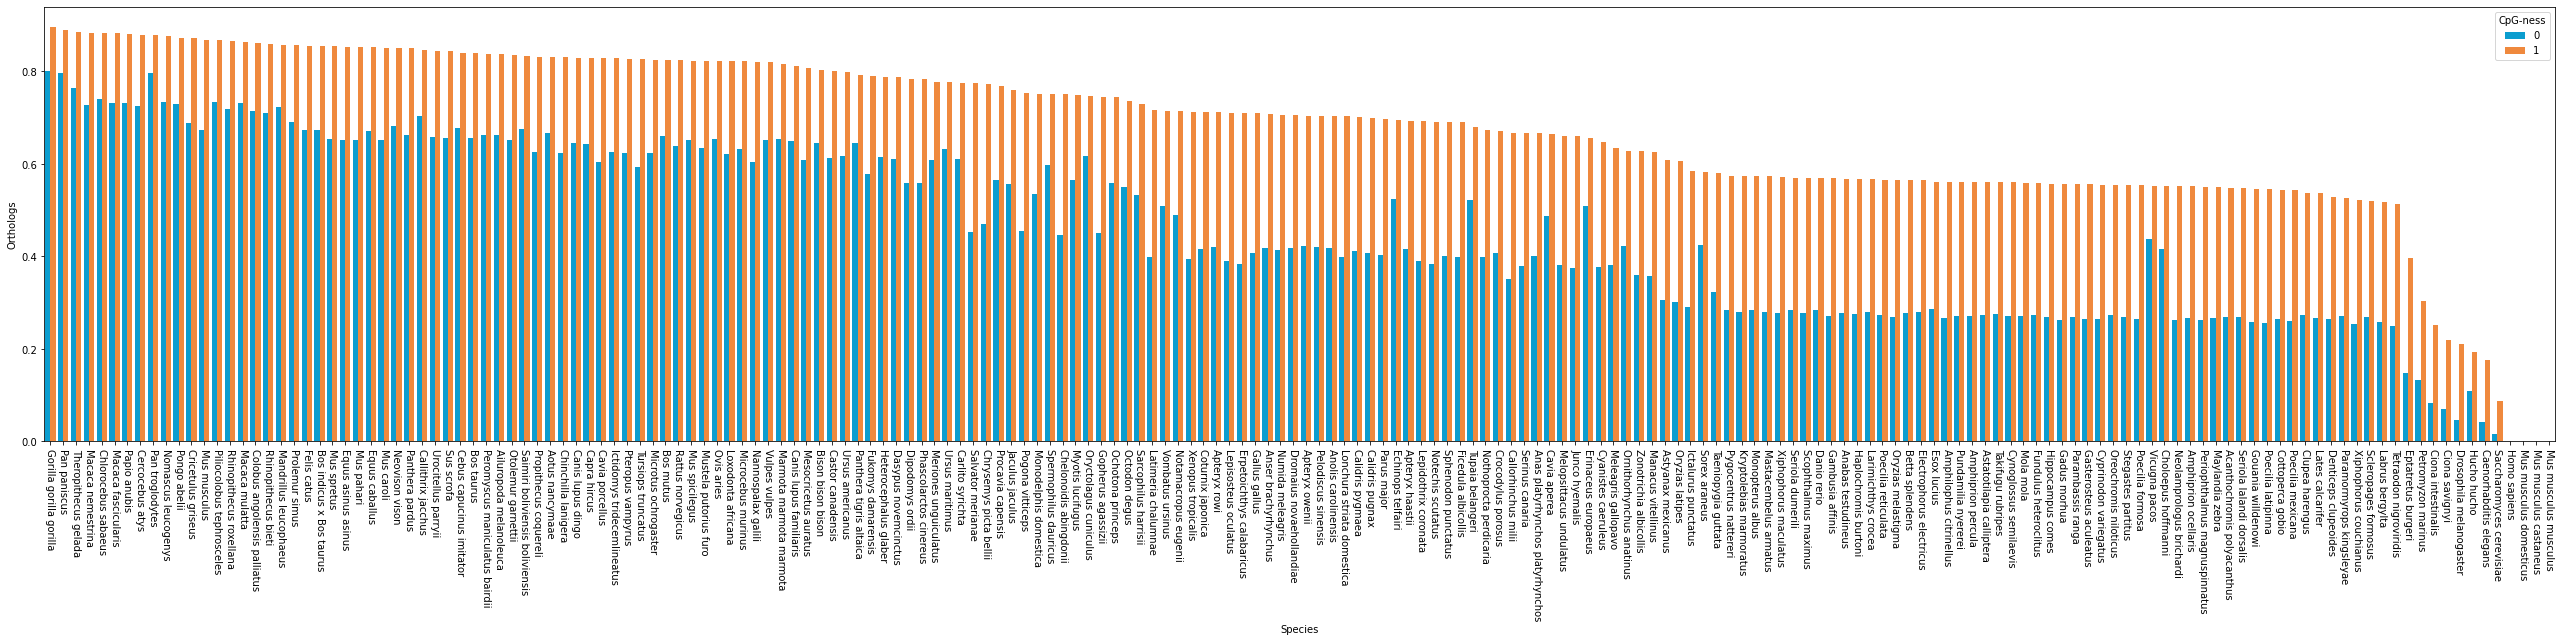

In [38]:
fig, ax = pyplot.subplots(figsize=(45,8))
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=frameelife, x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-bars-elife.pdf')

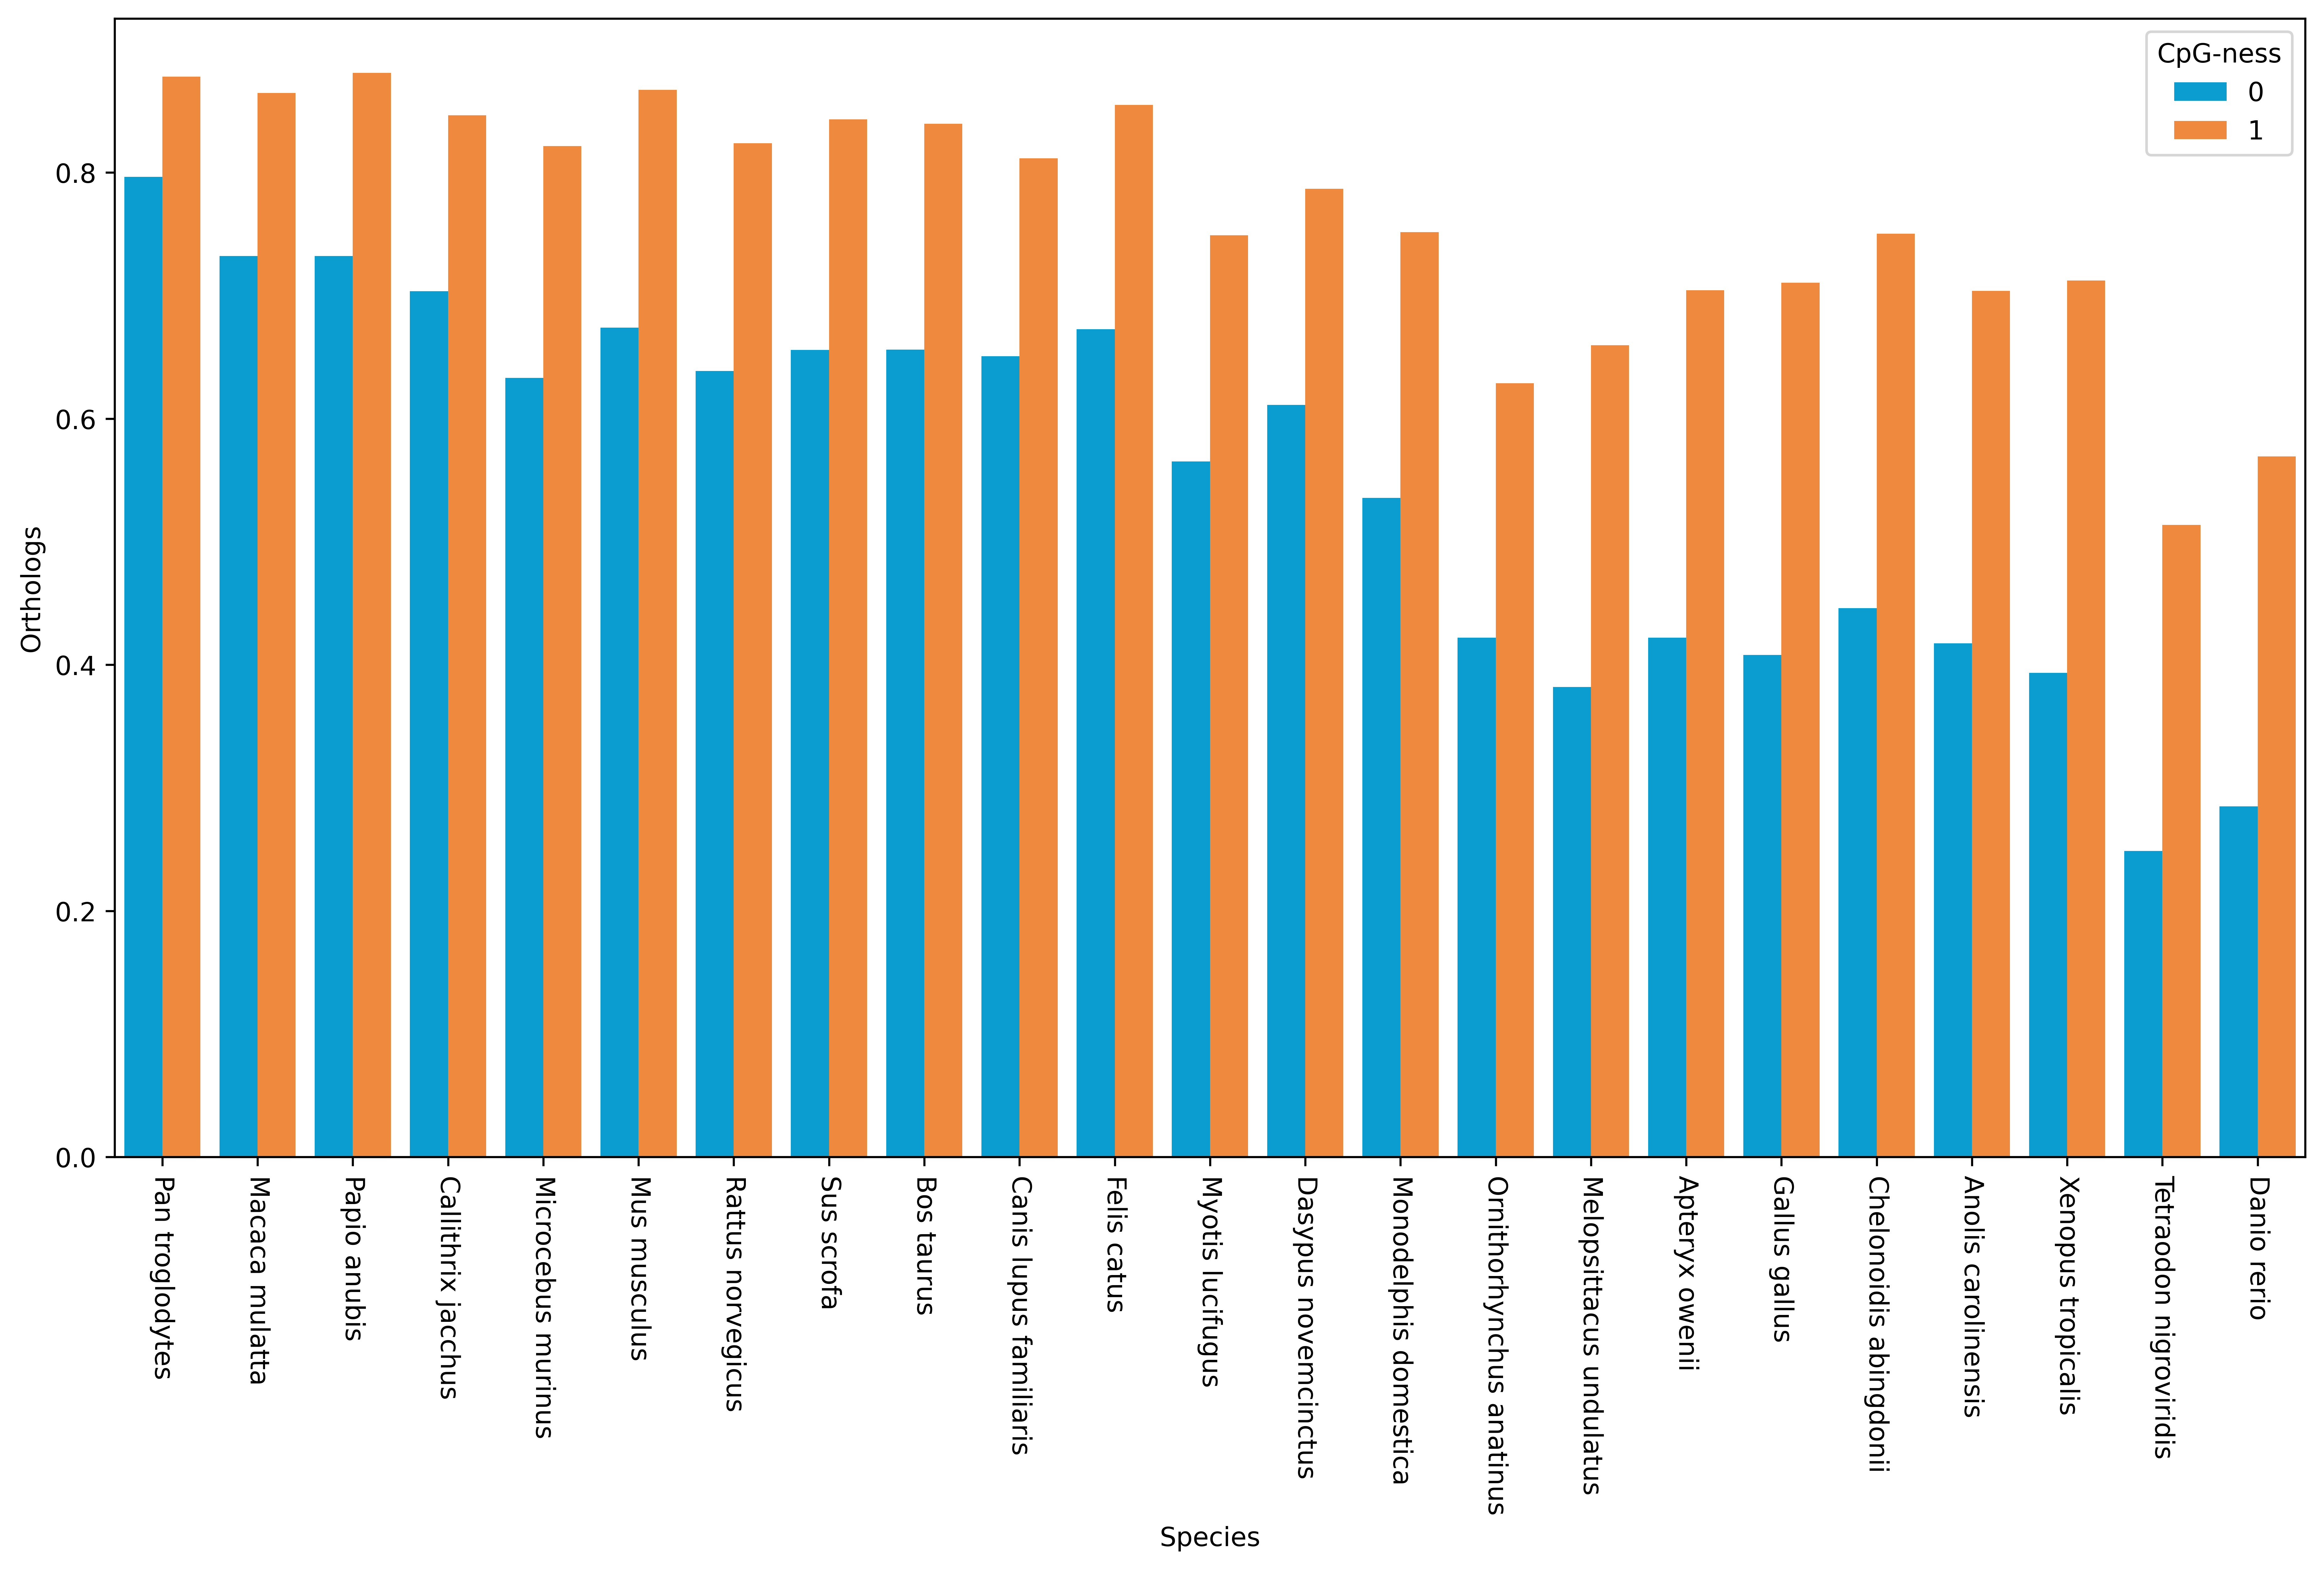

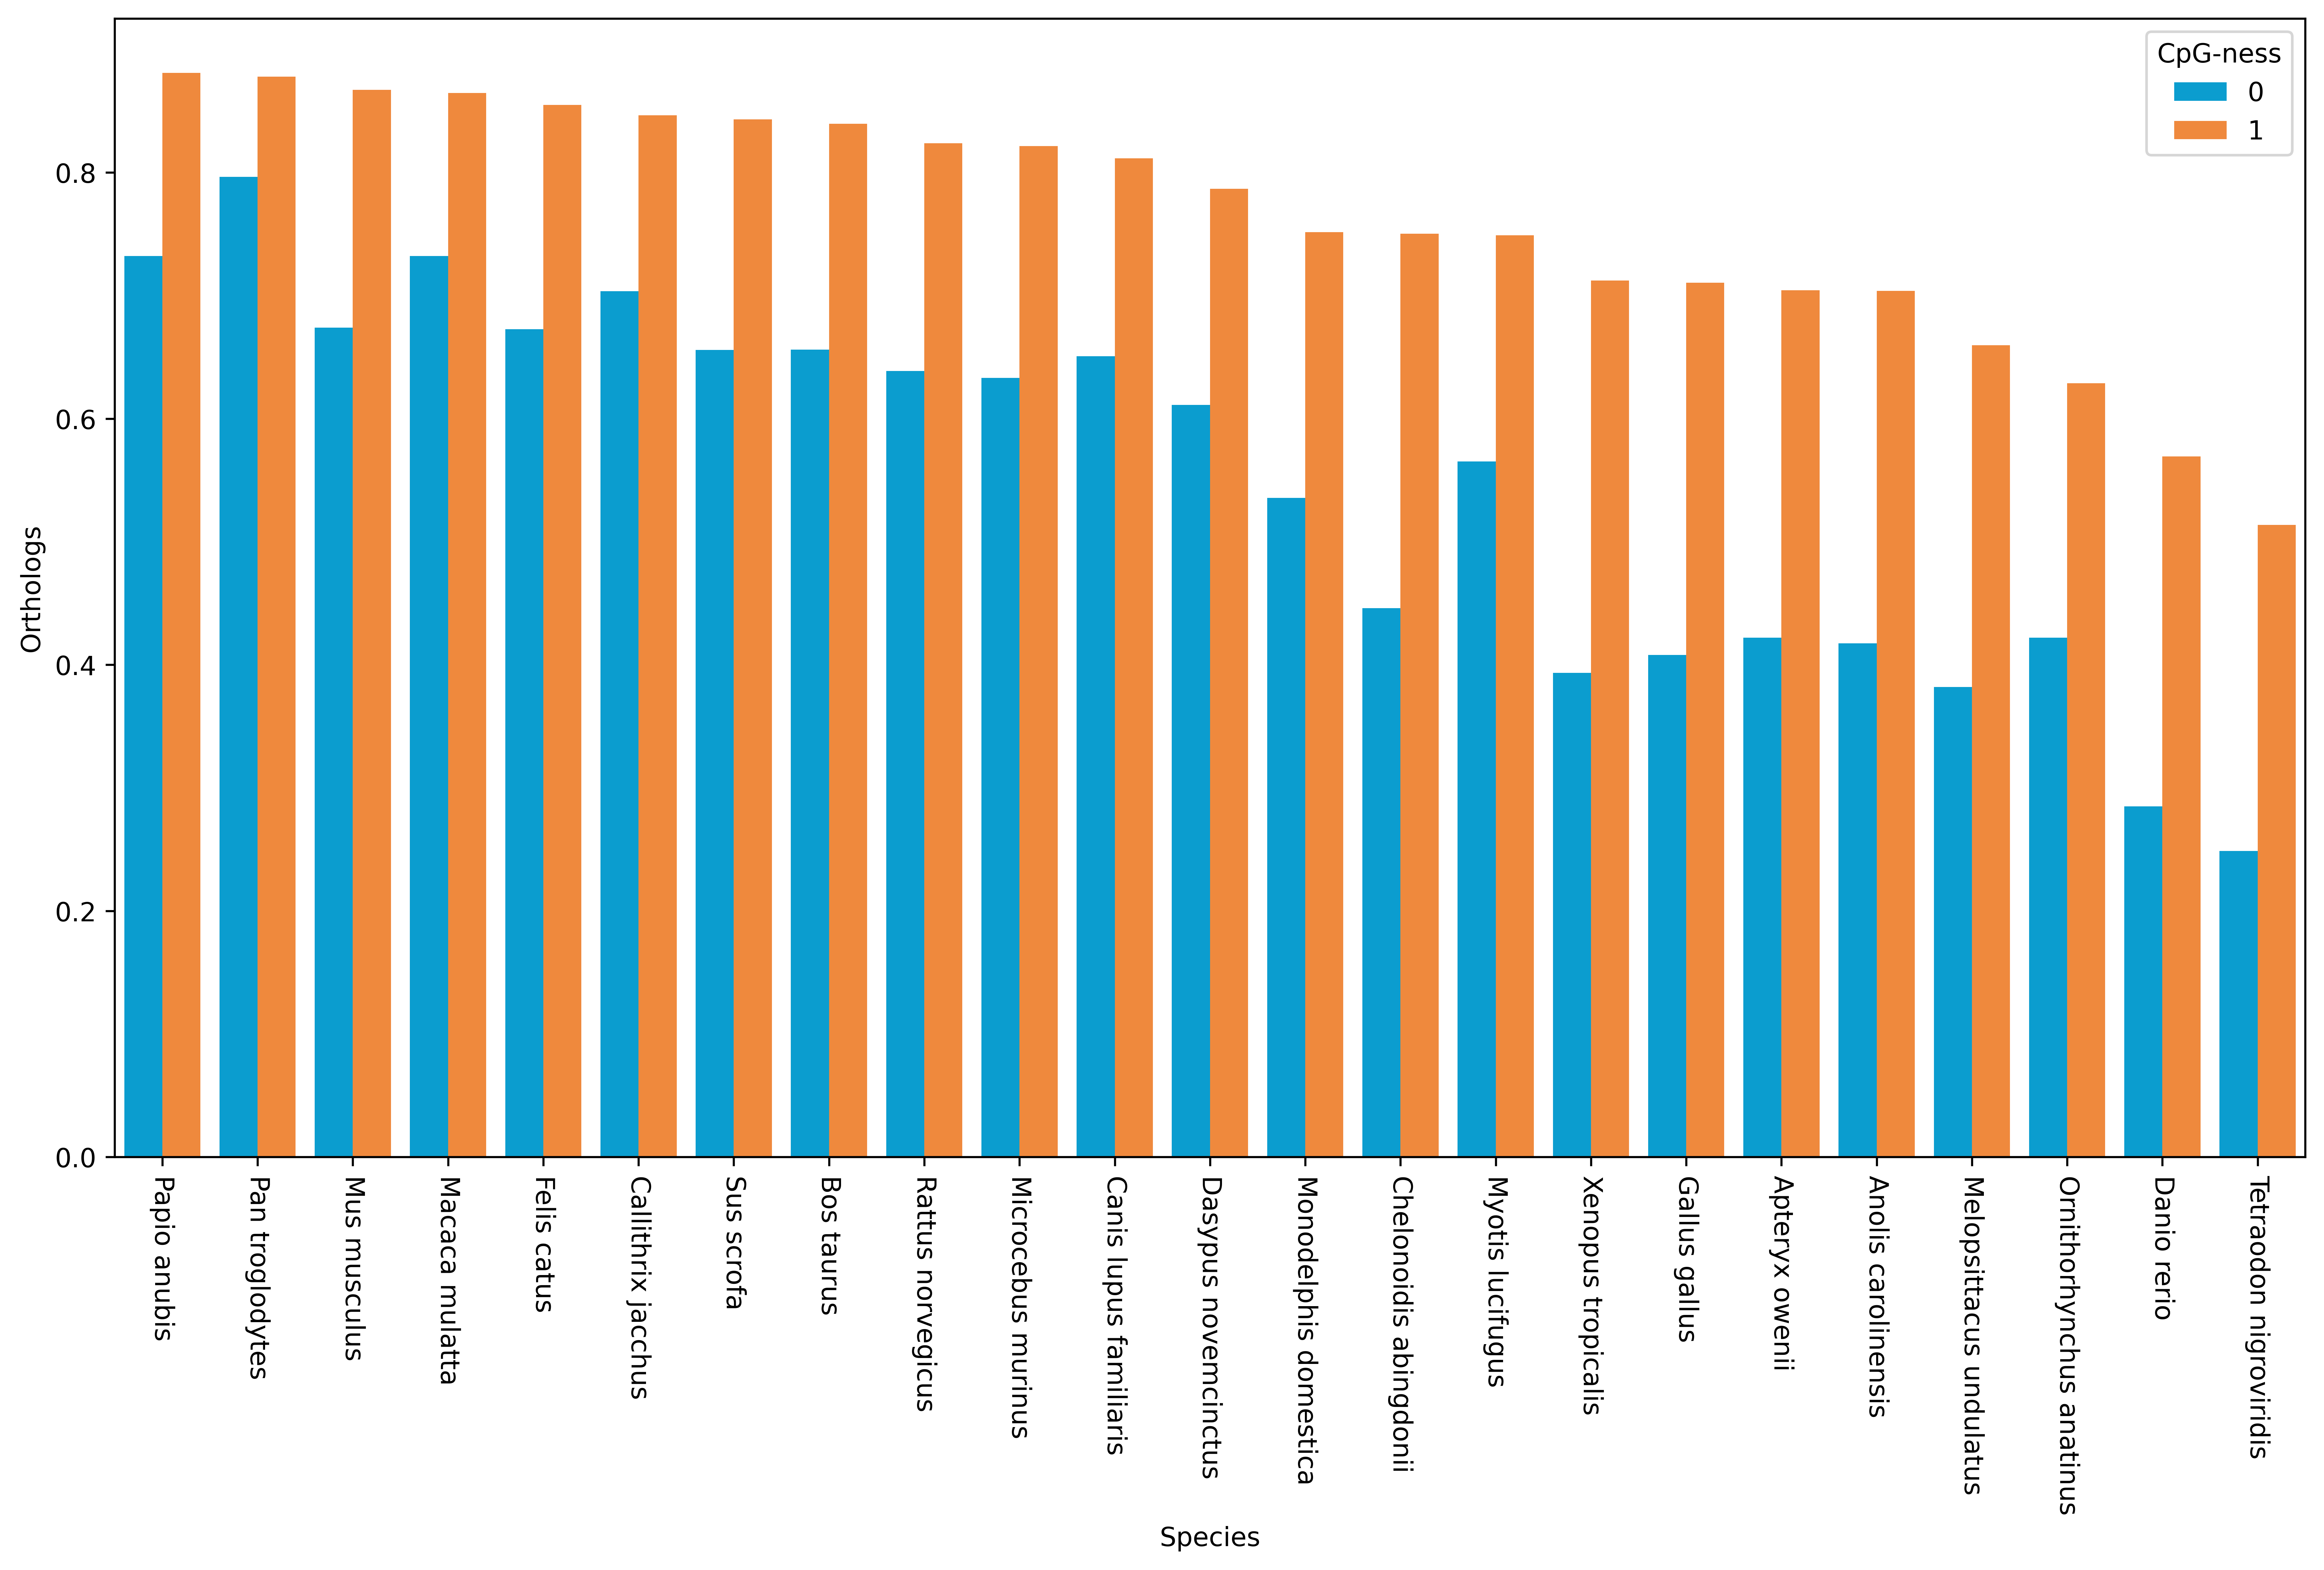

In [41]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frameelife[frameelife['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny-elife.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frameelife[frameelife['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio-elife.pdf')

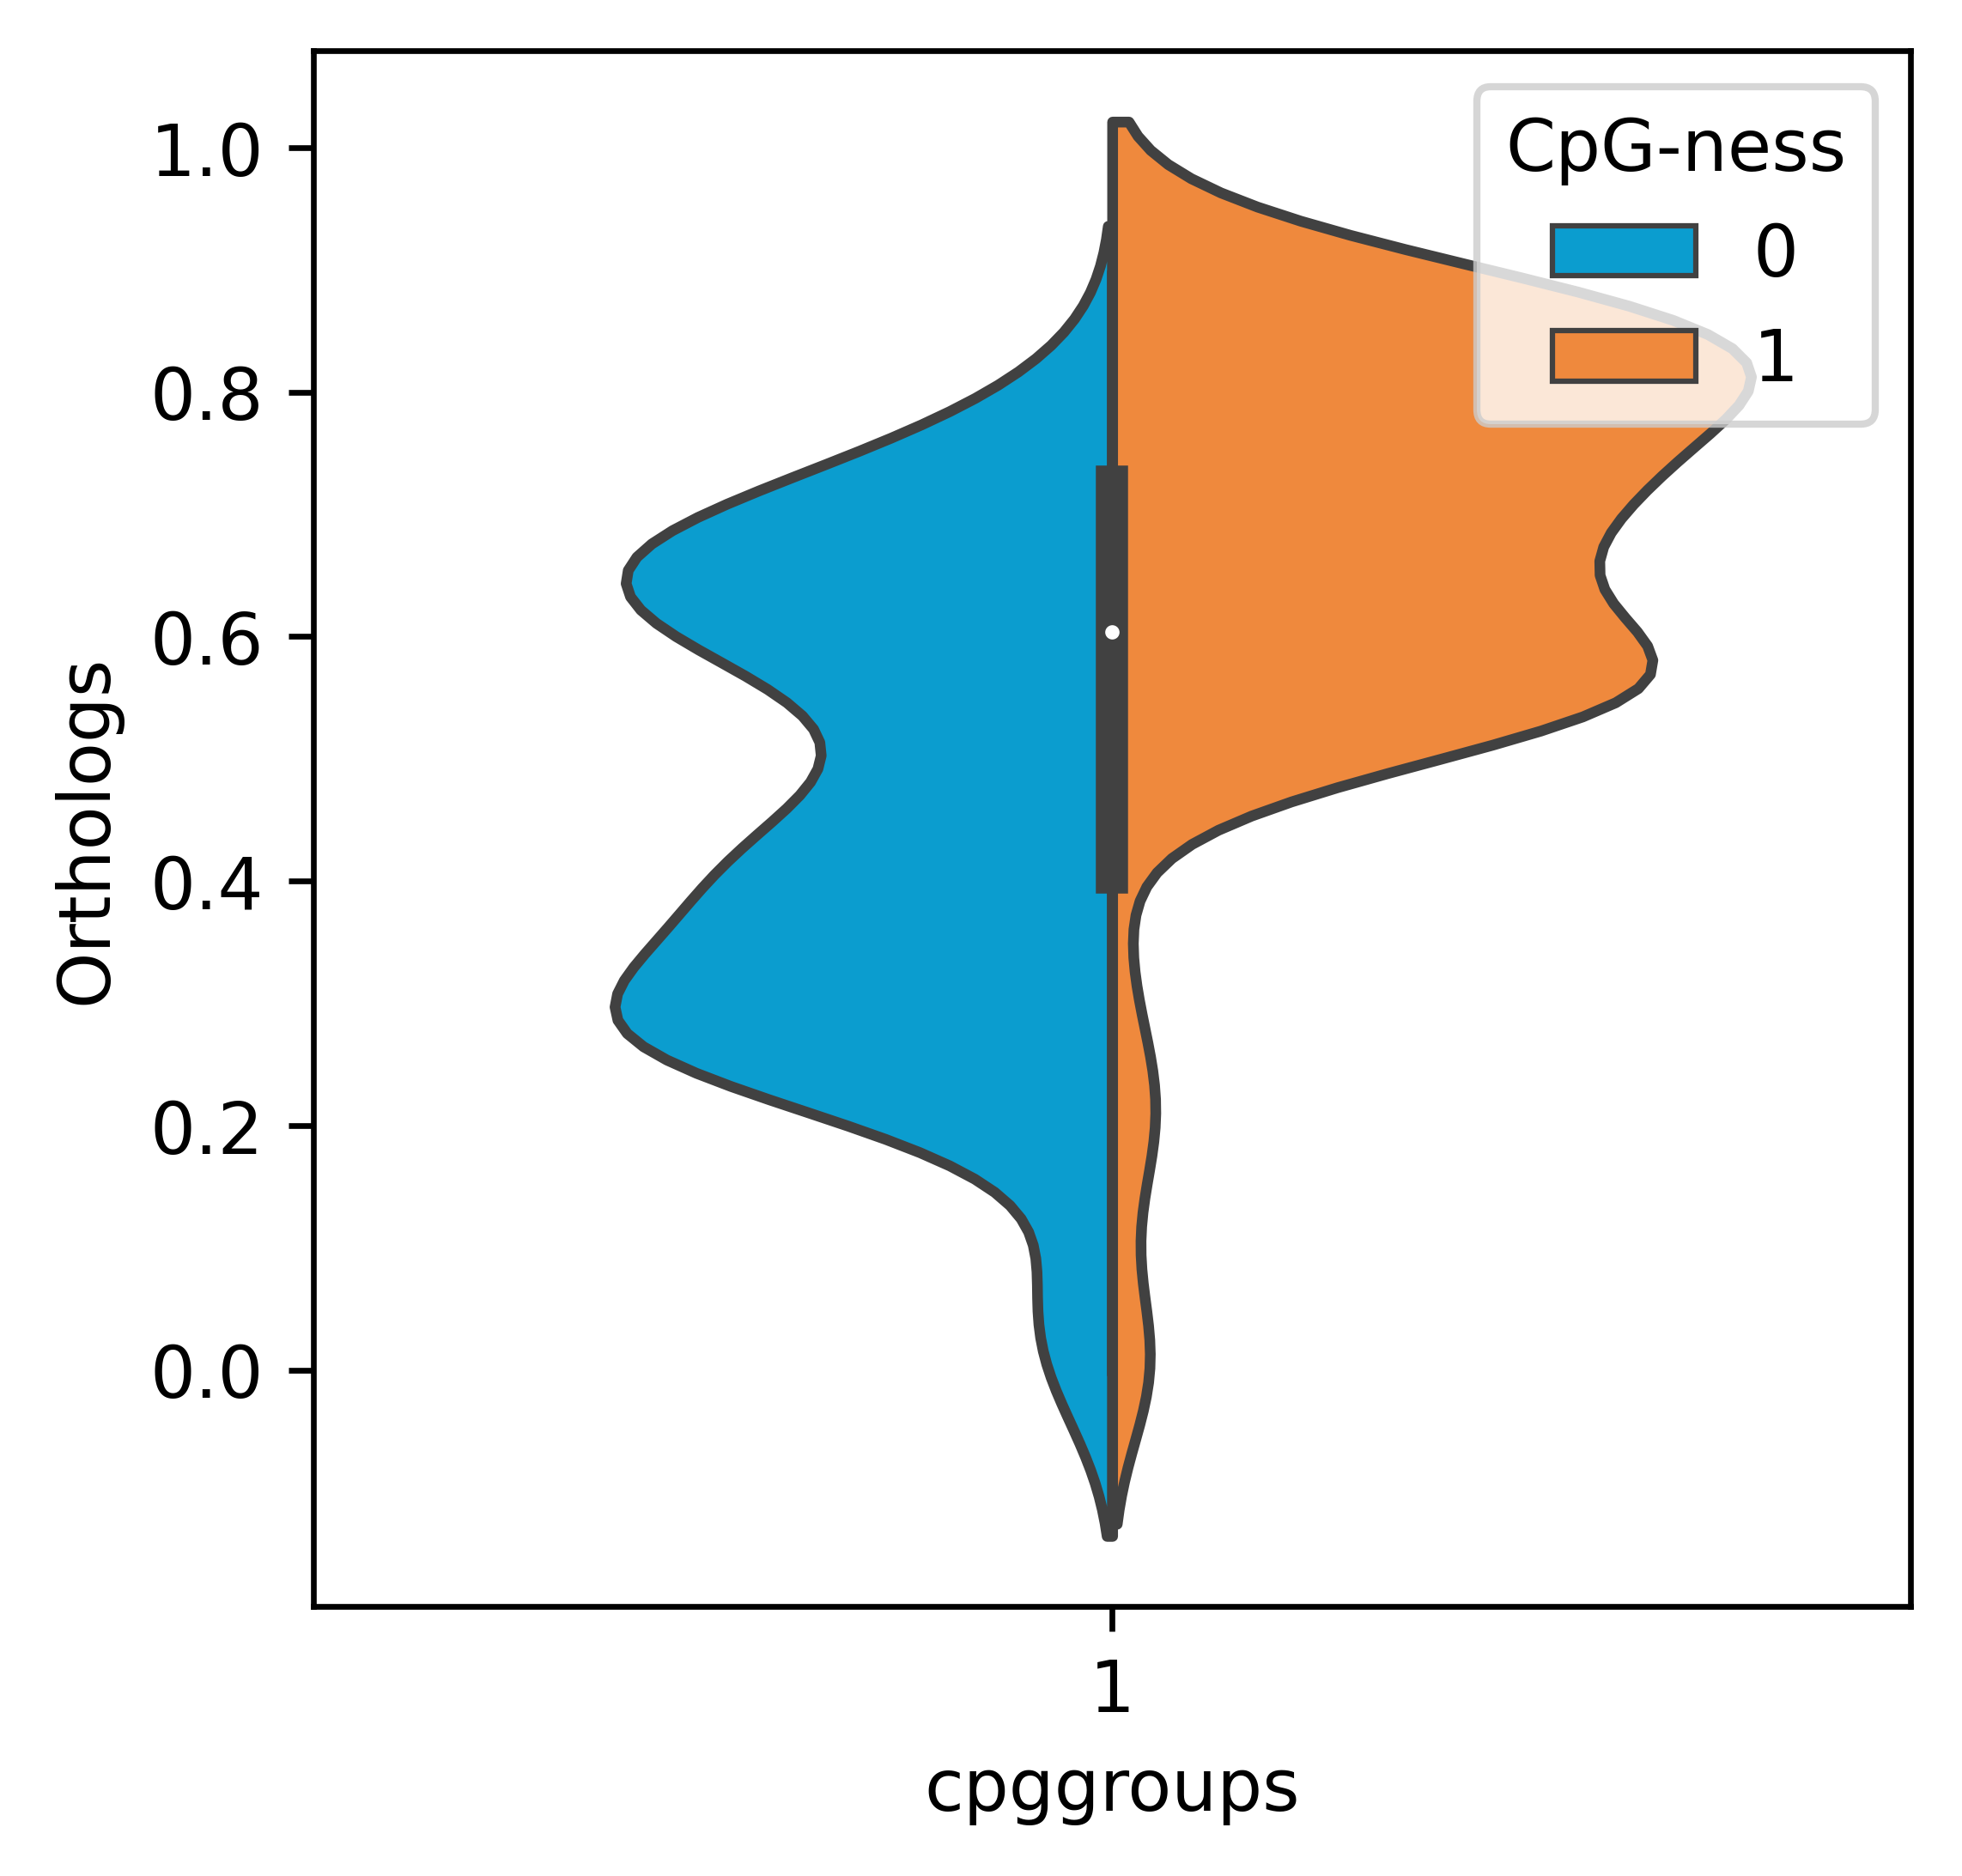

In [39]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frameelife.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin-elife.pdf')

The portion of species for which an ortholog exists for each genes - for cpg_less and cpg_full groups

In [40]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney on -300+100: 50%% %s'%str(mannwhitneyu(frameo[frameo['CpG-ness']==0]['Orthologs'], frameo[frameo['CpG-ness']==1]['Orthologs'], alternative='less')))
print('Mann-Whitney on -1000+1000: 1bp %s'%str(mannwhitneyu(frameelife[frameelife['CpG-ness']==0]['Orthologs'], frameelife[frameelife['CpG-ness']==1]['Orthologs'], alternative='less')))

Mann-Whitney on -300+100: 50% MannwhitneyuResult(statistic=8074.0, pvalue=1.605152875961793e-23)
Mann-Whitney on -1000+1000: 1bp MannwhitneyuResult(statistic=7565.0, pvalue=1.5329809464563394e-25)


In [19]:
pickle.dump(frame, open('/data/db/import/save/orthologs.pkl', 'wb'))

In [33]:
from pandas import DataFrame, read_csv
genes=DataFrame.from_records([(s, s in cpg_full) for s in o2os.keys()], columns = ['id', 'cpg'])
genexpr = read_csv('/home/evgeny/tau/gen_cpg/GTEx_Analysis_gene_median_tpm.txt', delimiter='\t', index_col='Name')
genexpr = genexpr.drop([i for i in genexpr.index if i.count('_') > 0])
genexpr.index = [g.split('.')[0] for g in genexpr.index]
genexpr.index = ['gene:'+g for g in genexpr.index]
humgenes=read_csv('human-genes.csv').set_index('index')['gene_length']
humgenes.index = ['gene:'+g for g in humgenes.index]
gmatch = genes.set_index('id').join(genexpr.T.mean().rename('expr'), how='inner').join(humgenes, how='inner')


In [31]:
from seaborn import violinplot, despine, boxplot, barplot
from pandas import DataFrame
from matplotlib import pyplot
import row_matchers
cpg_len_full, cpg_len_less = row_matchers.one_to_one_matches(gmatch[gmatch['cpg']==True], gmatch[gmatch['cpg']==False], 'gene_length', 100)
cpg_len_full, cpg_len_less = set(cpg_len_full.index), set(cpg_len_less.index)

frame_len=DataFrame.from_records([(bo, len([g for g in cpg_len_less if bo in o2os[g]])/len(cpg_len_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_len_full if bo in o2os[g]])/len(cpg_len_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frame_len=frame_len.sort_values("Orthologs", ascending=False)


ERROR! Session/line number was not unique in database. History logging moved to new session 228


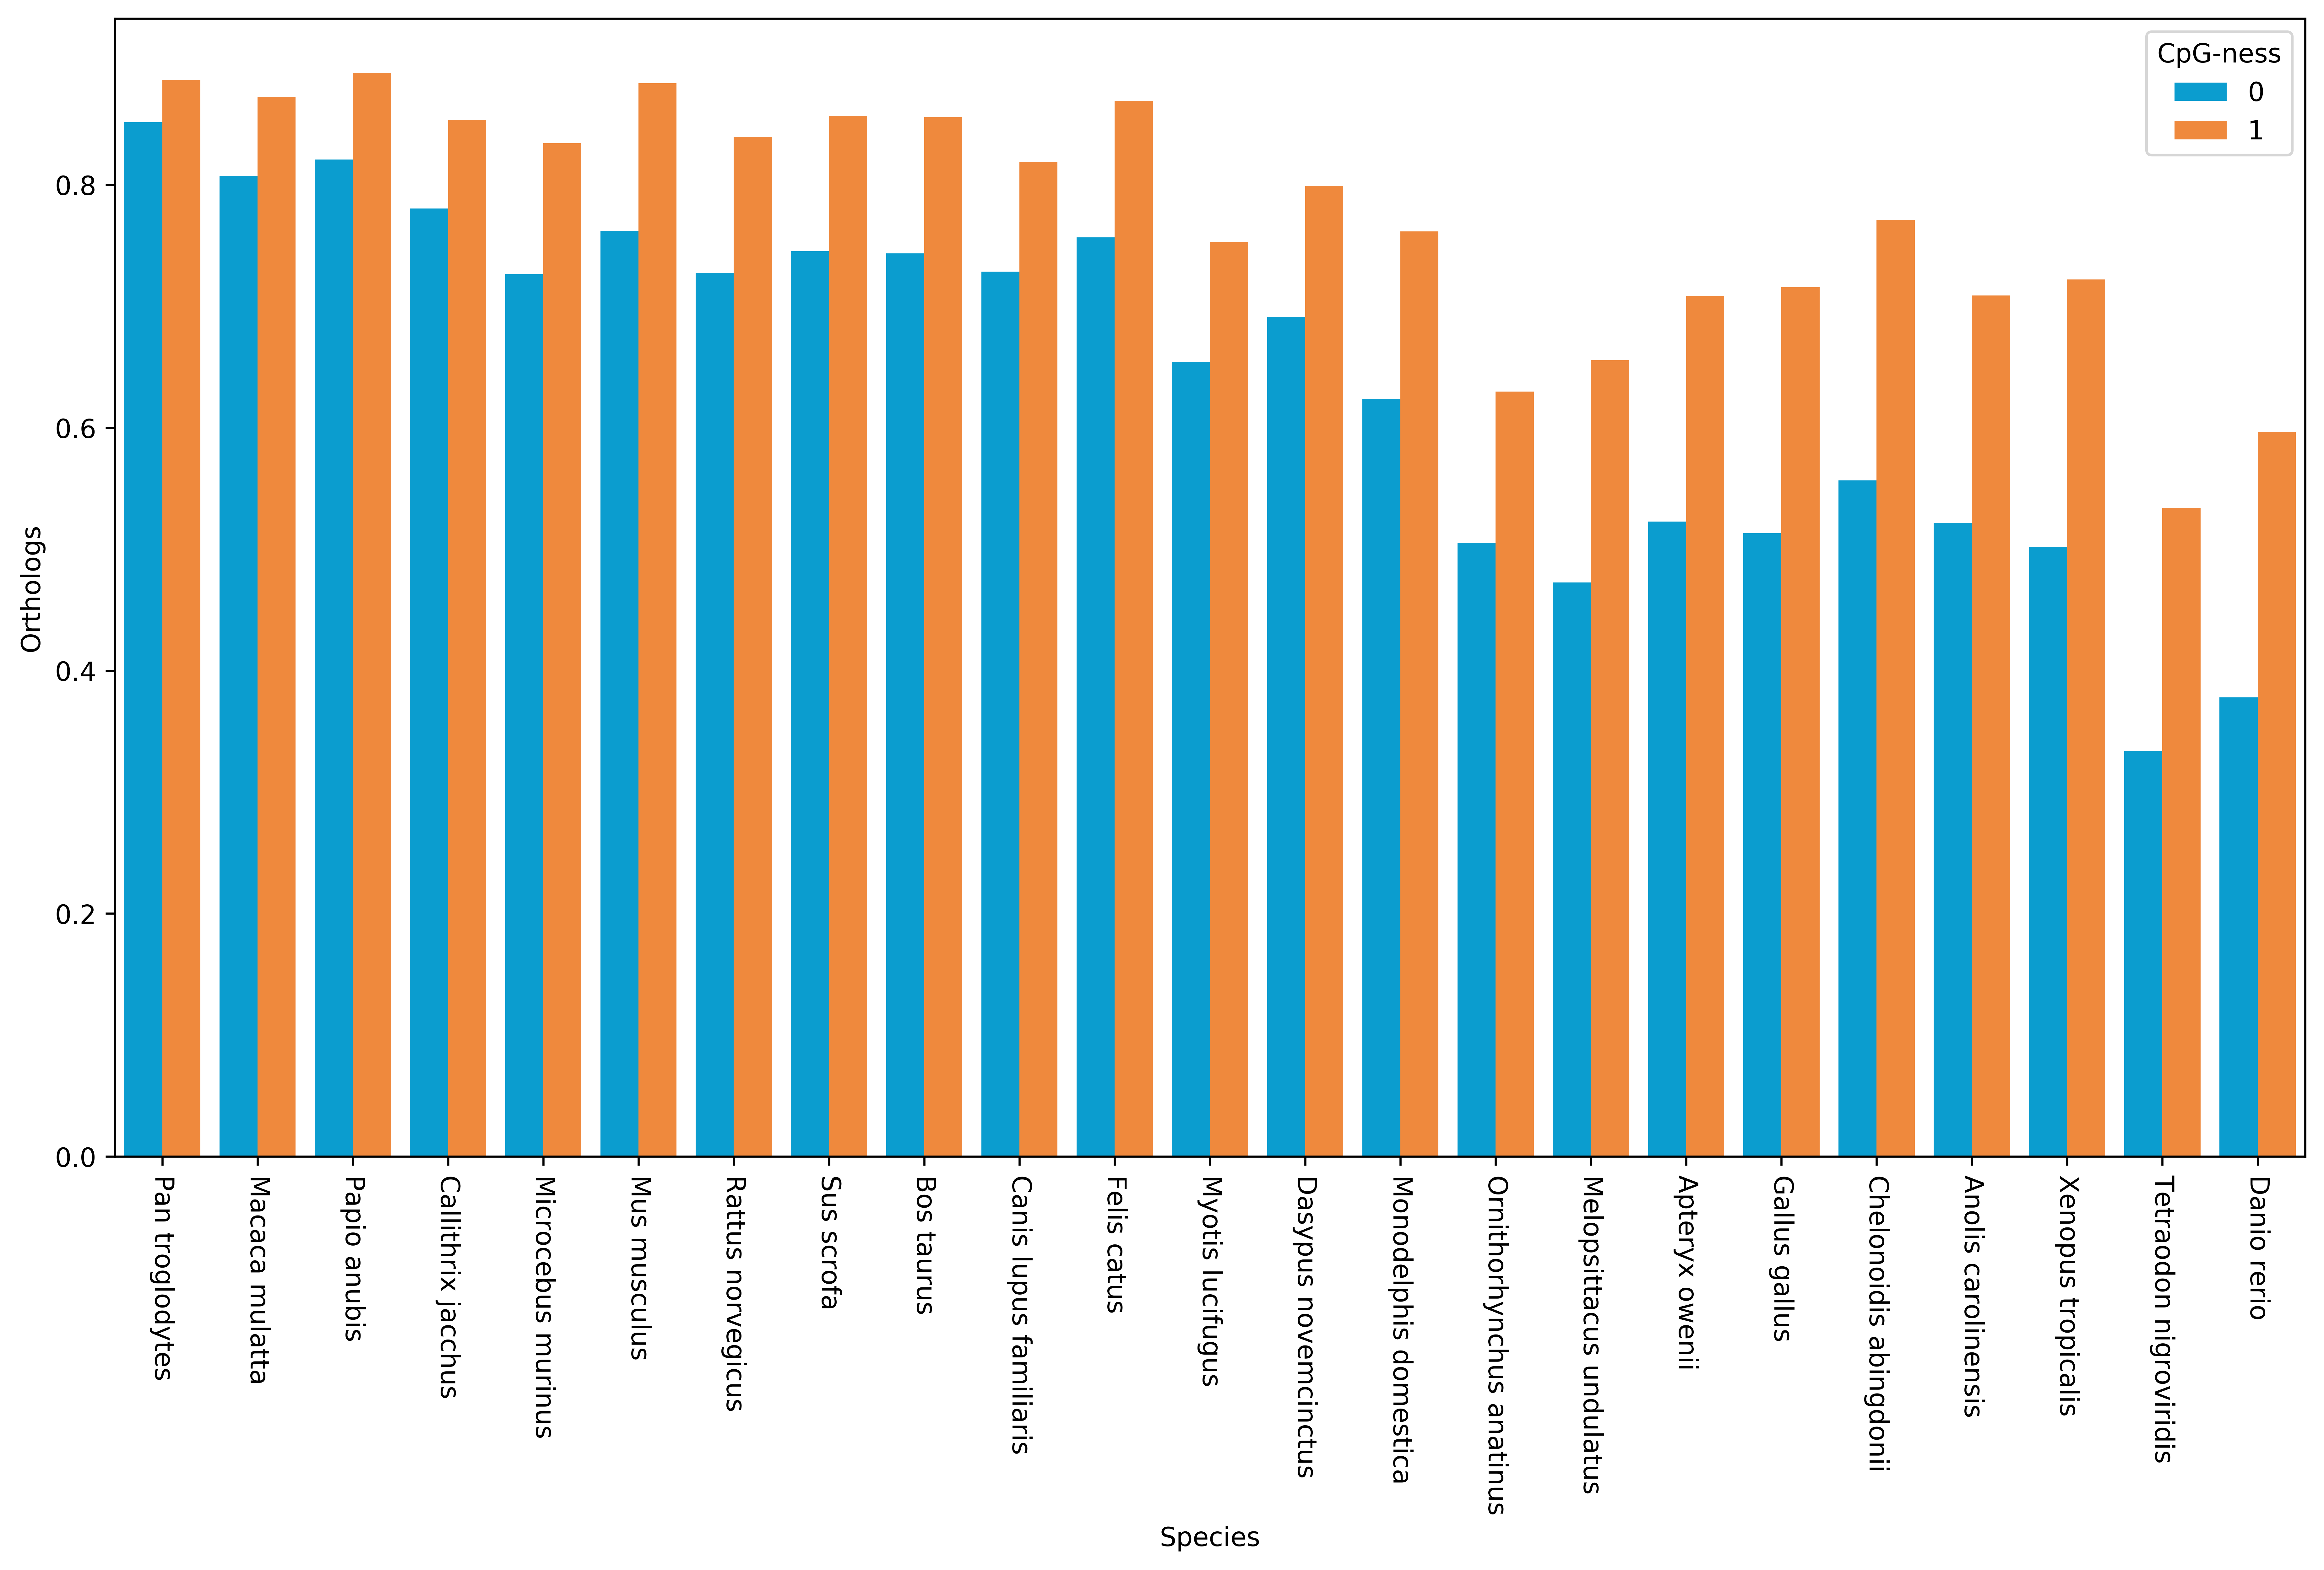

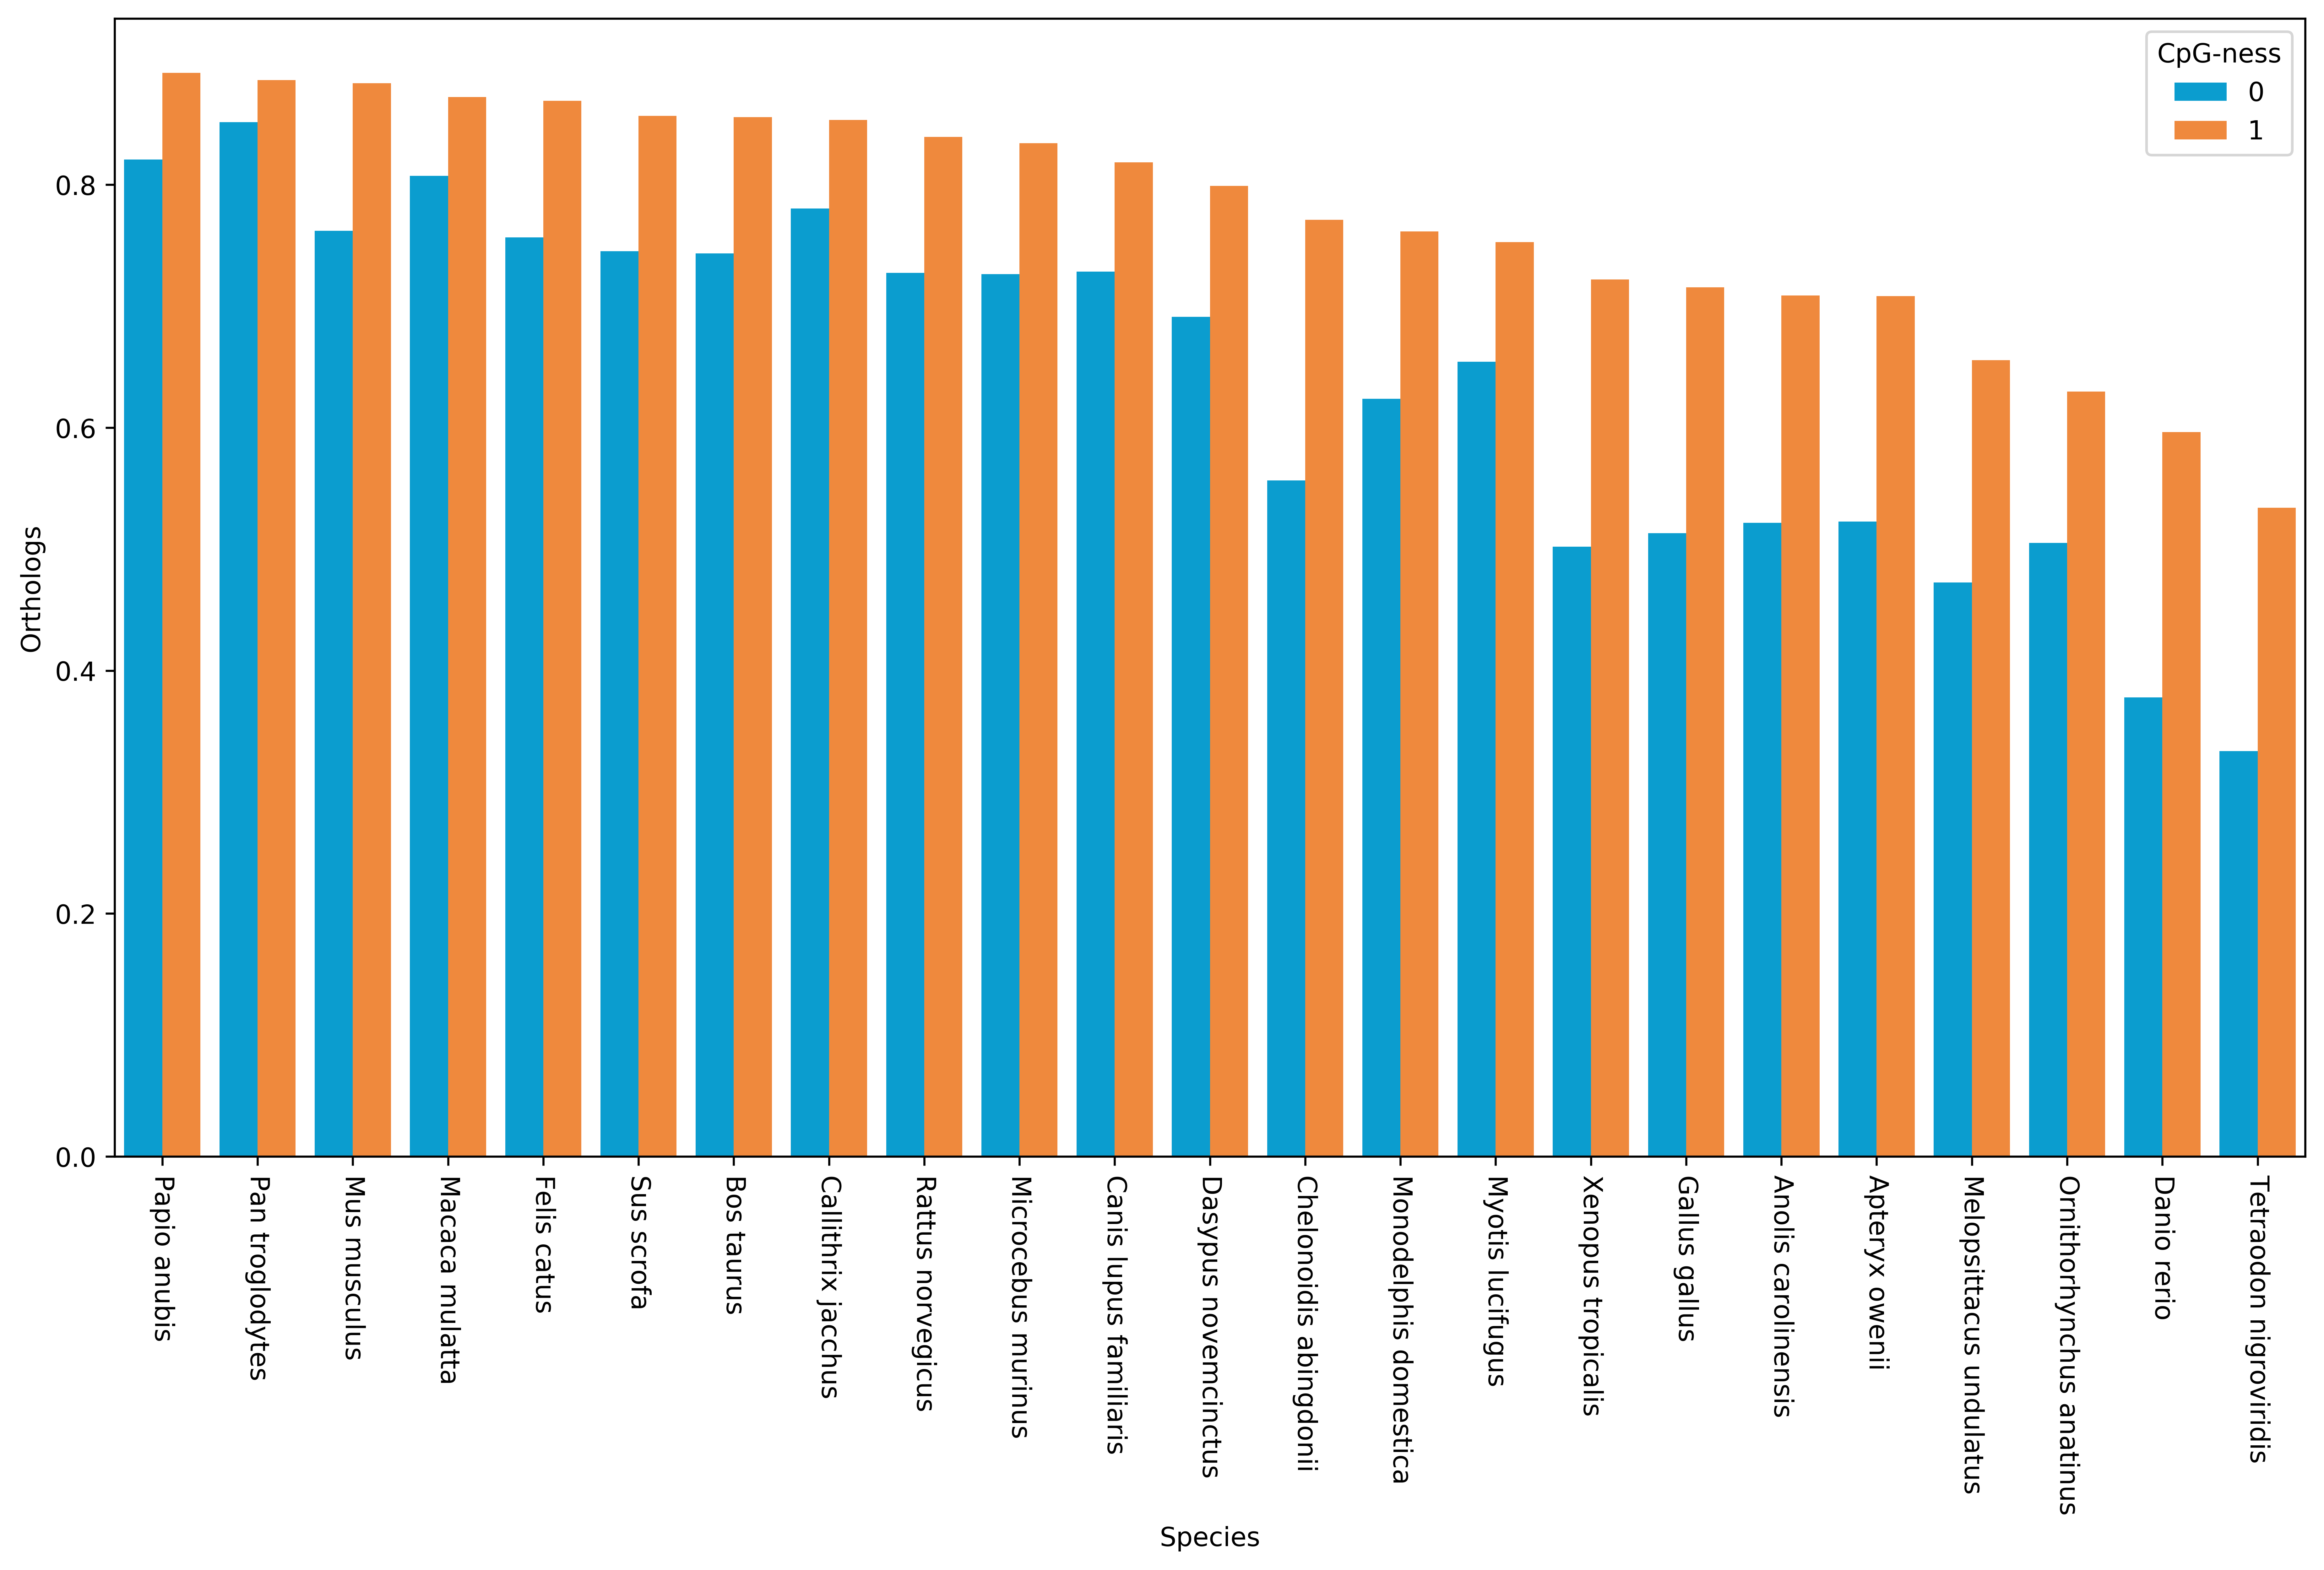

In [32]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame_len[frame_len['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny-controlled-for-length.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame_len[frame_len['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio-controlled-for-length.pdf')

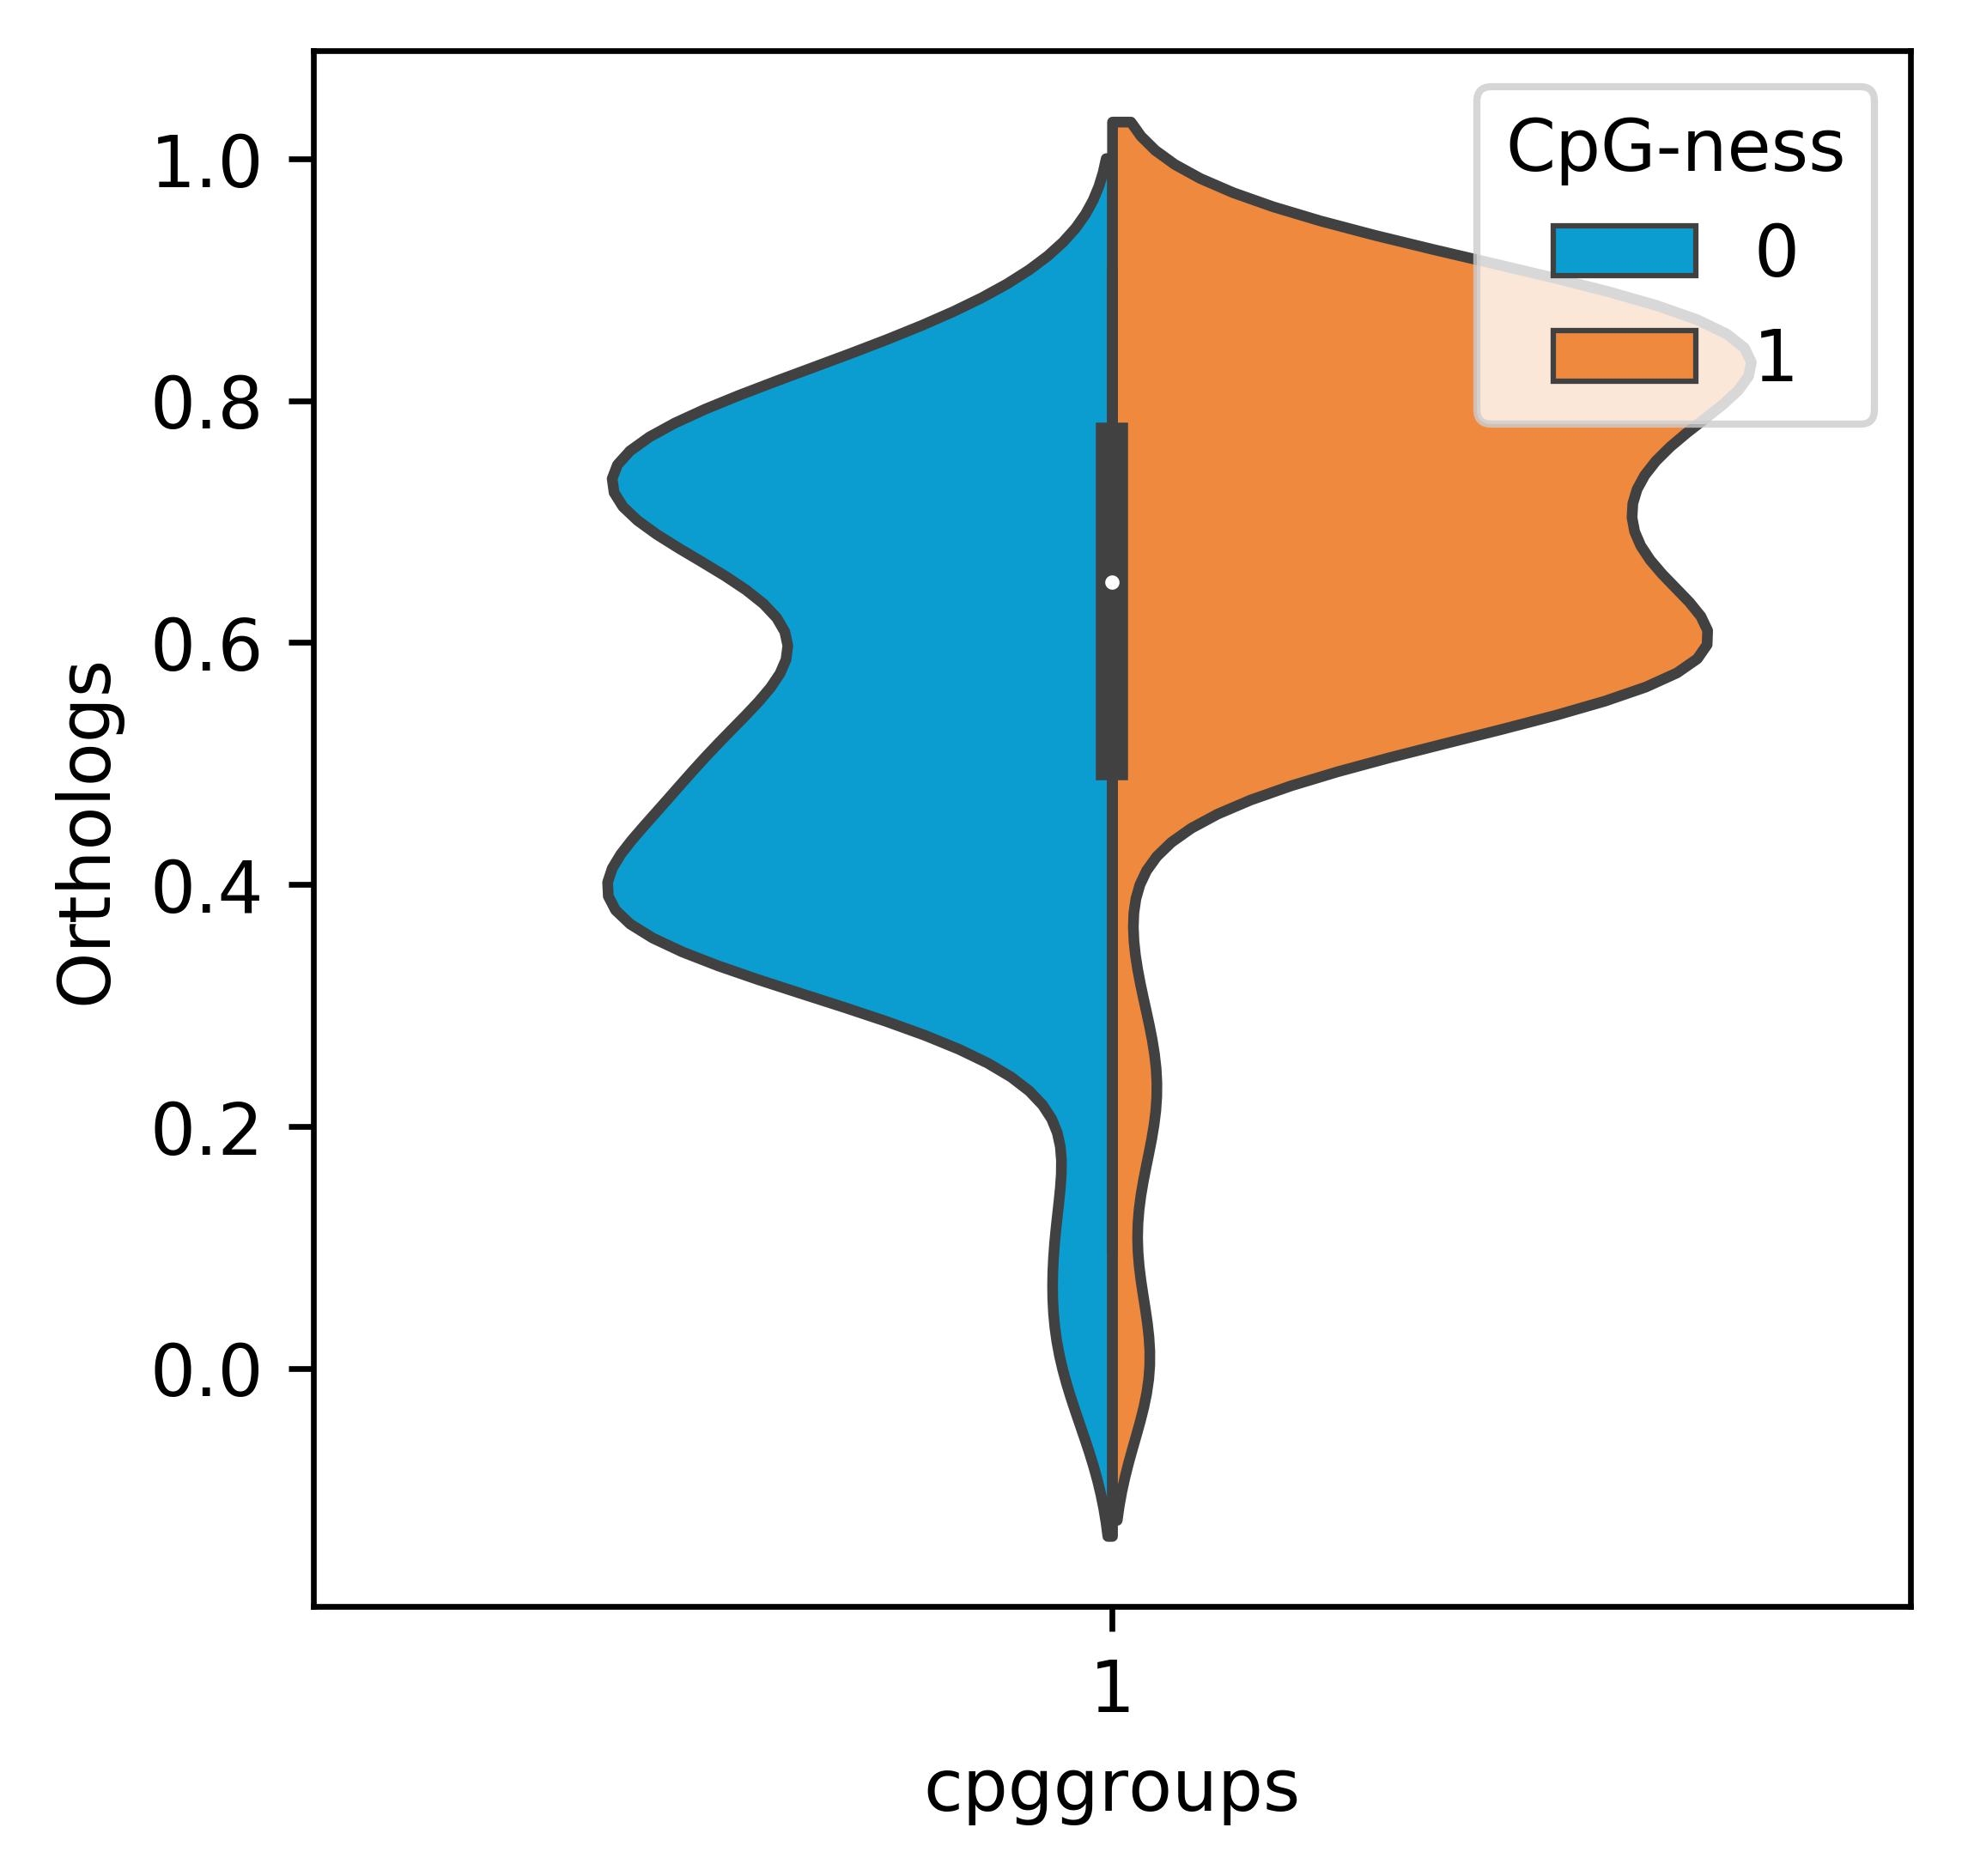

In [55]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frame_len.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin-corrected-for-length.pdf')

In [39]:
import numpy as np
gmatch=gmatch[gmatch['expr']>0.01].assign(expr_log = lambda x: np.log(x['expr']))


In [40]:
cpg_expr_full, cpg_expr_less = row_matchers.one_to_one_matches(gmatch[gmatch['cpg']==True], gmatch[gmatch['cpg']==False], 'expr_log', 0.1)
cpg_expr_full, cpg_expr_less = set(cpg_expr_full.index), set(cpg_expr_less.index)

frame_expr=DataFrame.from_records([(bo, len([g for g in cpg_expr_less if bo in o2os[g]])/len(cpg_expr_less), 0) for bo in species]+
                             [(bo, len([g for g in cpg_expr_full if bo in o2os[g]])/len(cpg_expr_full), 1) for bo in species], columns=['Species', 'Orthologs', 'CpG-ness'])
frame_expr=frame_expr.sort_values("Orthologs", ascending=False)

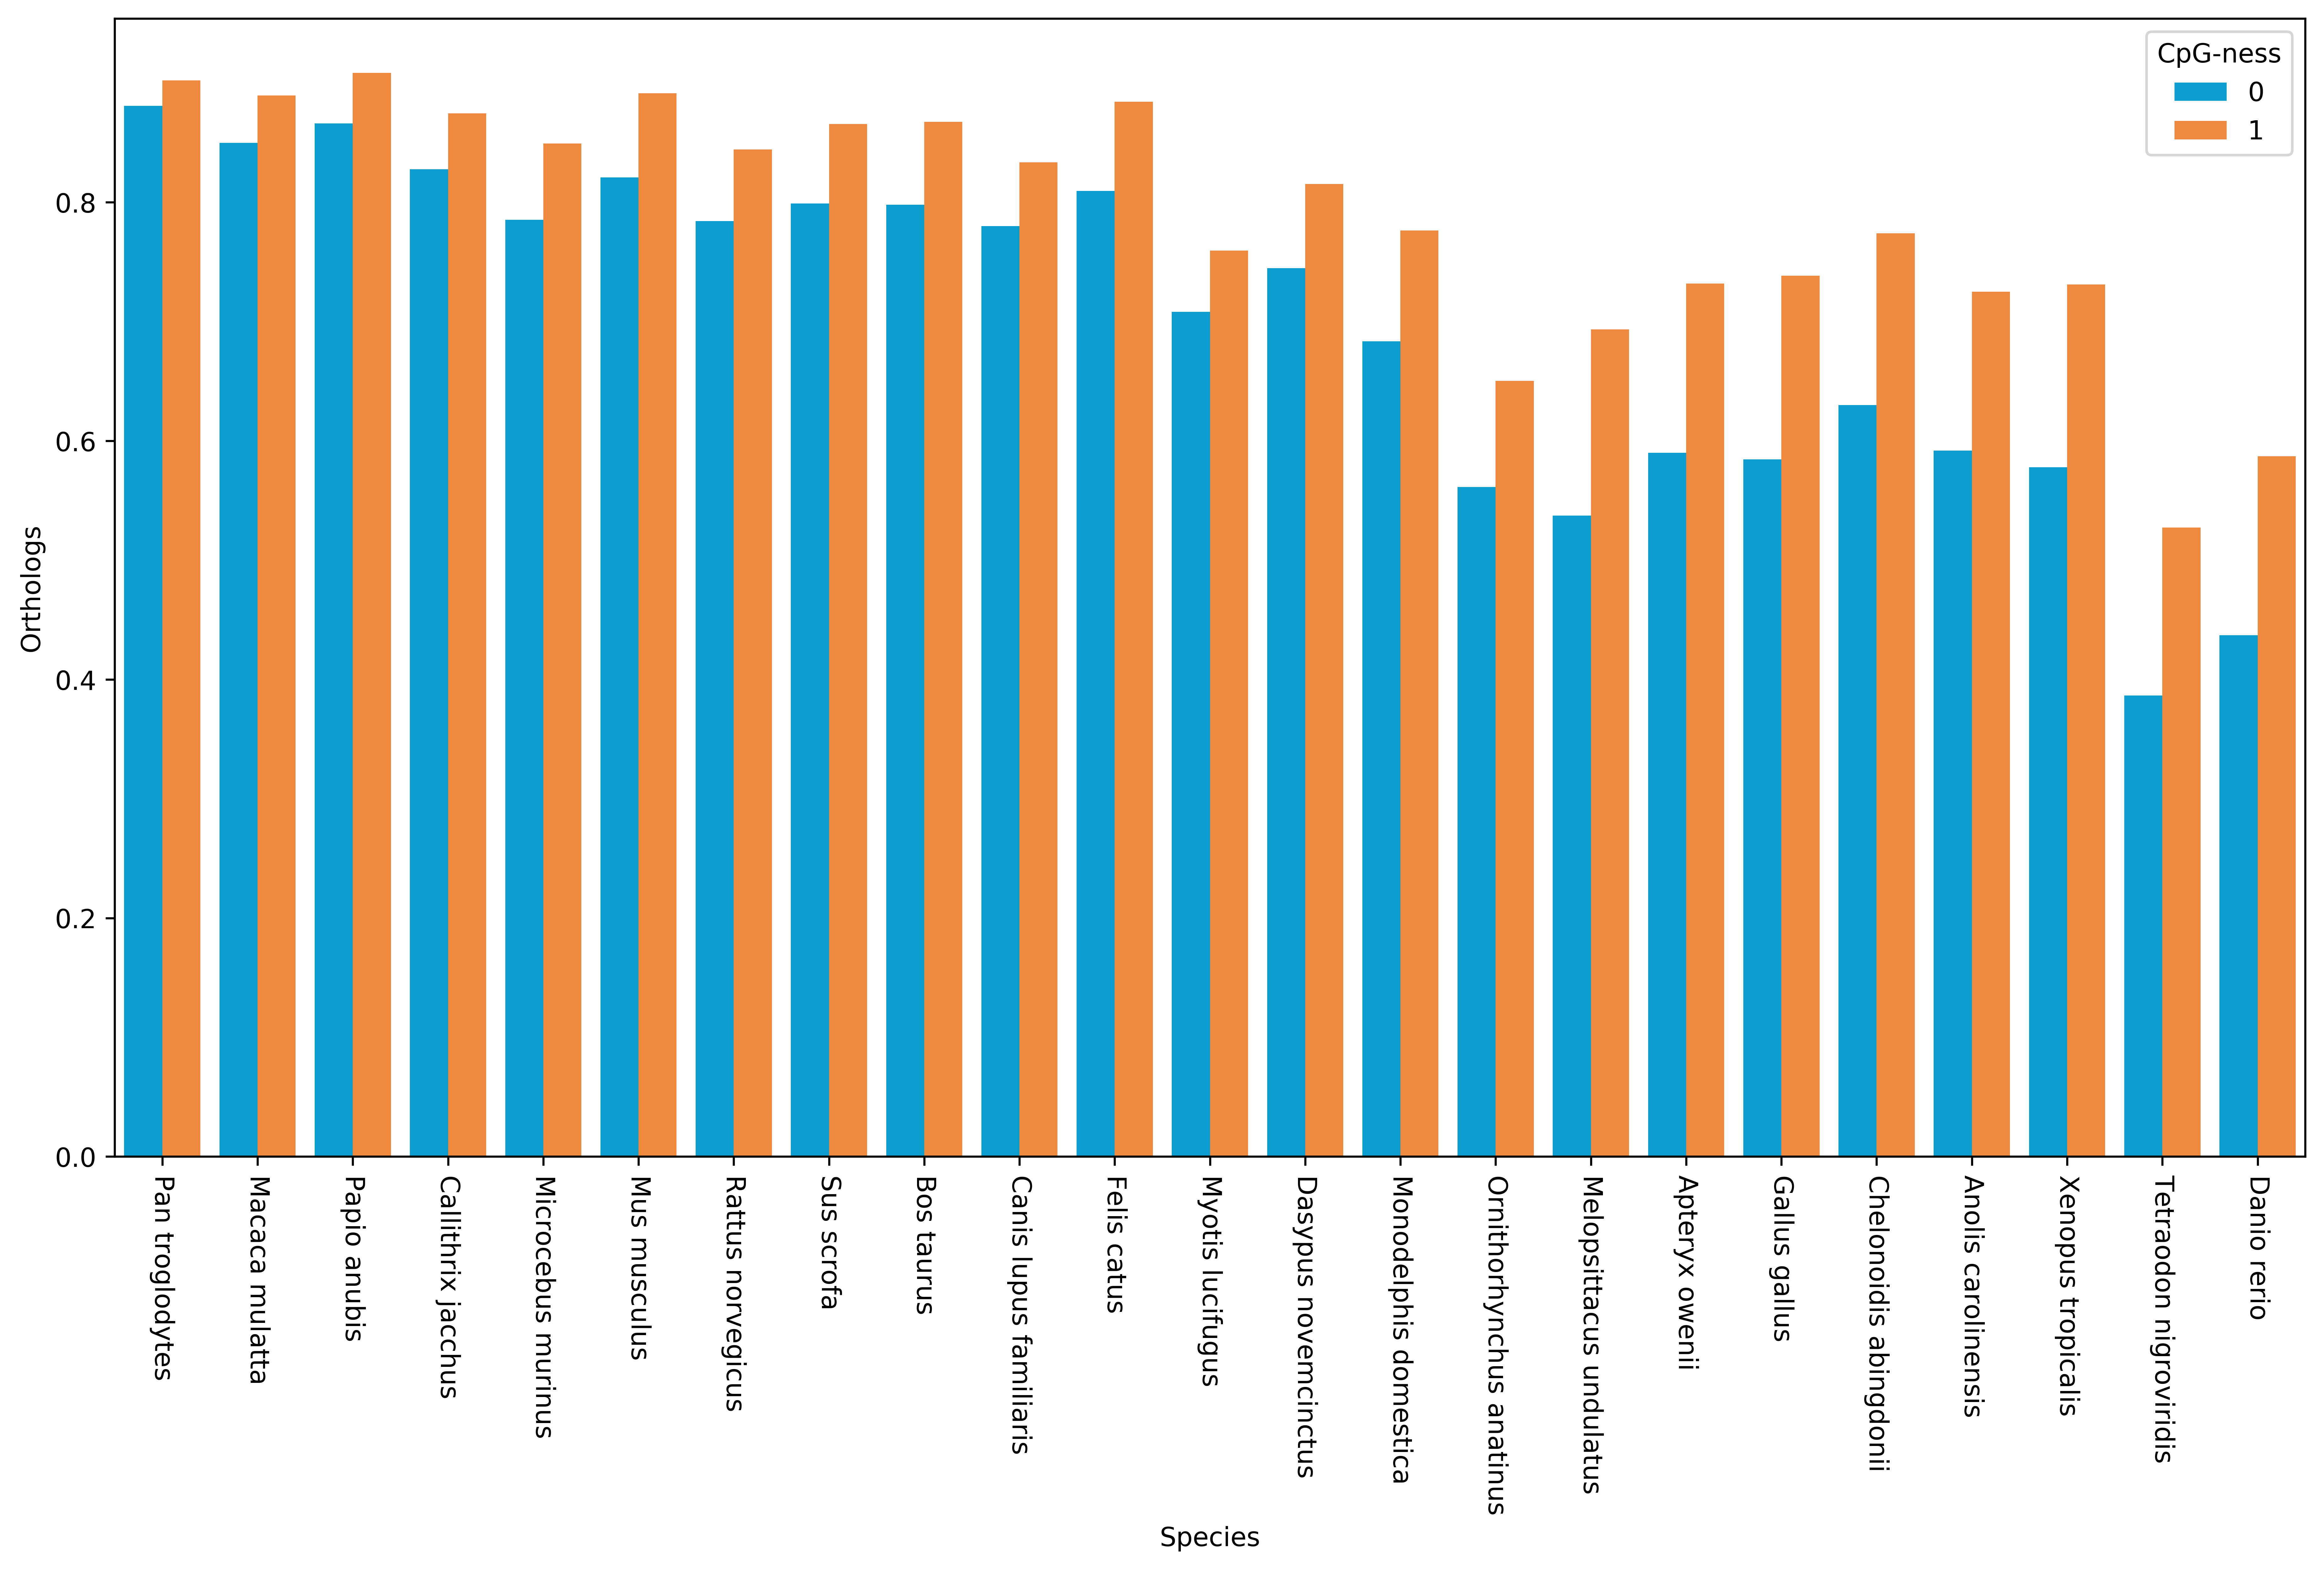

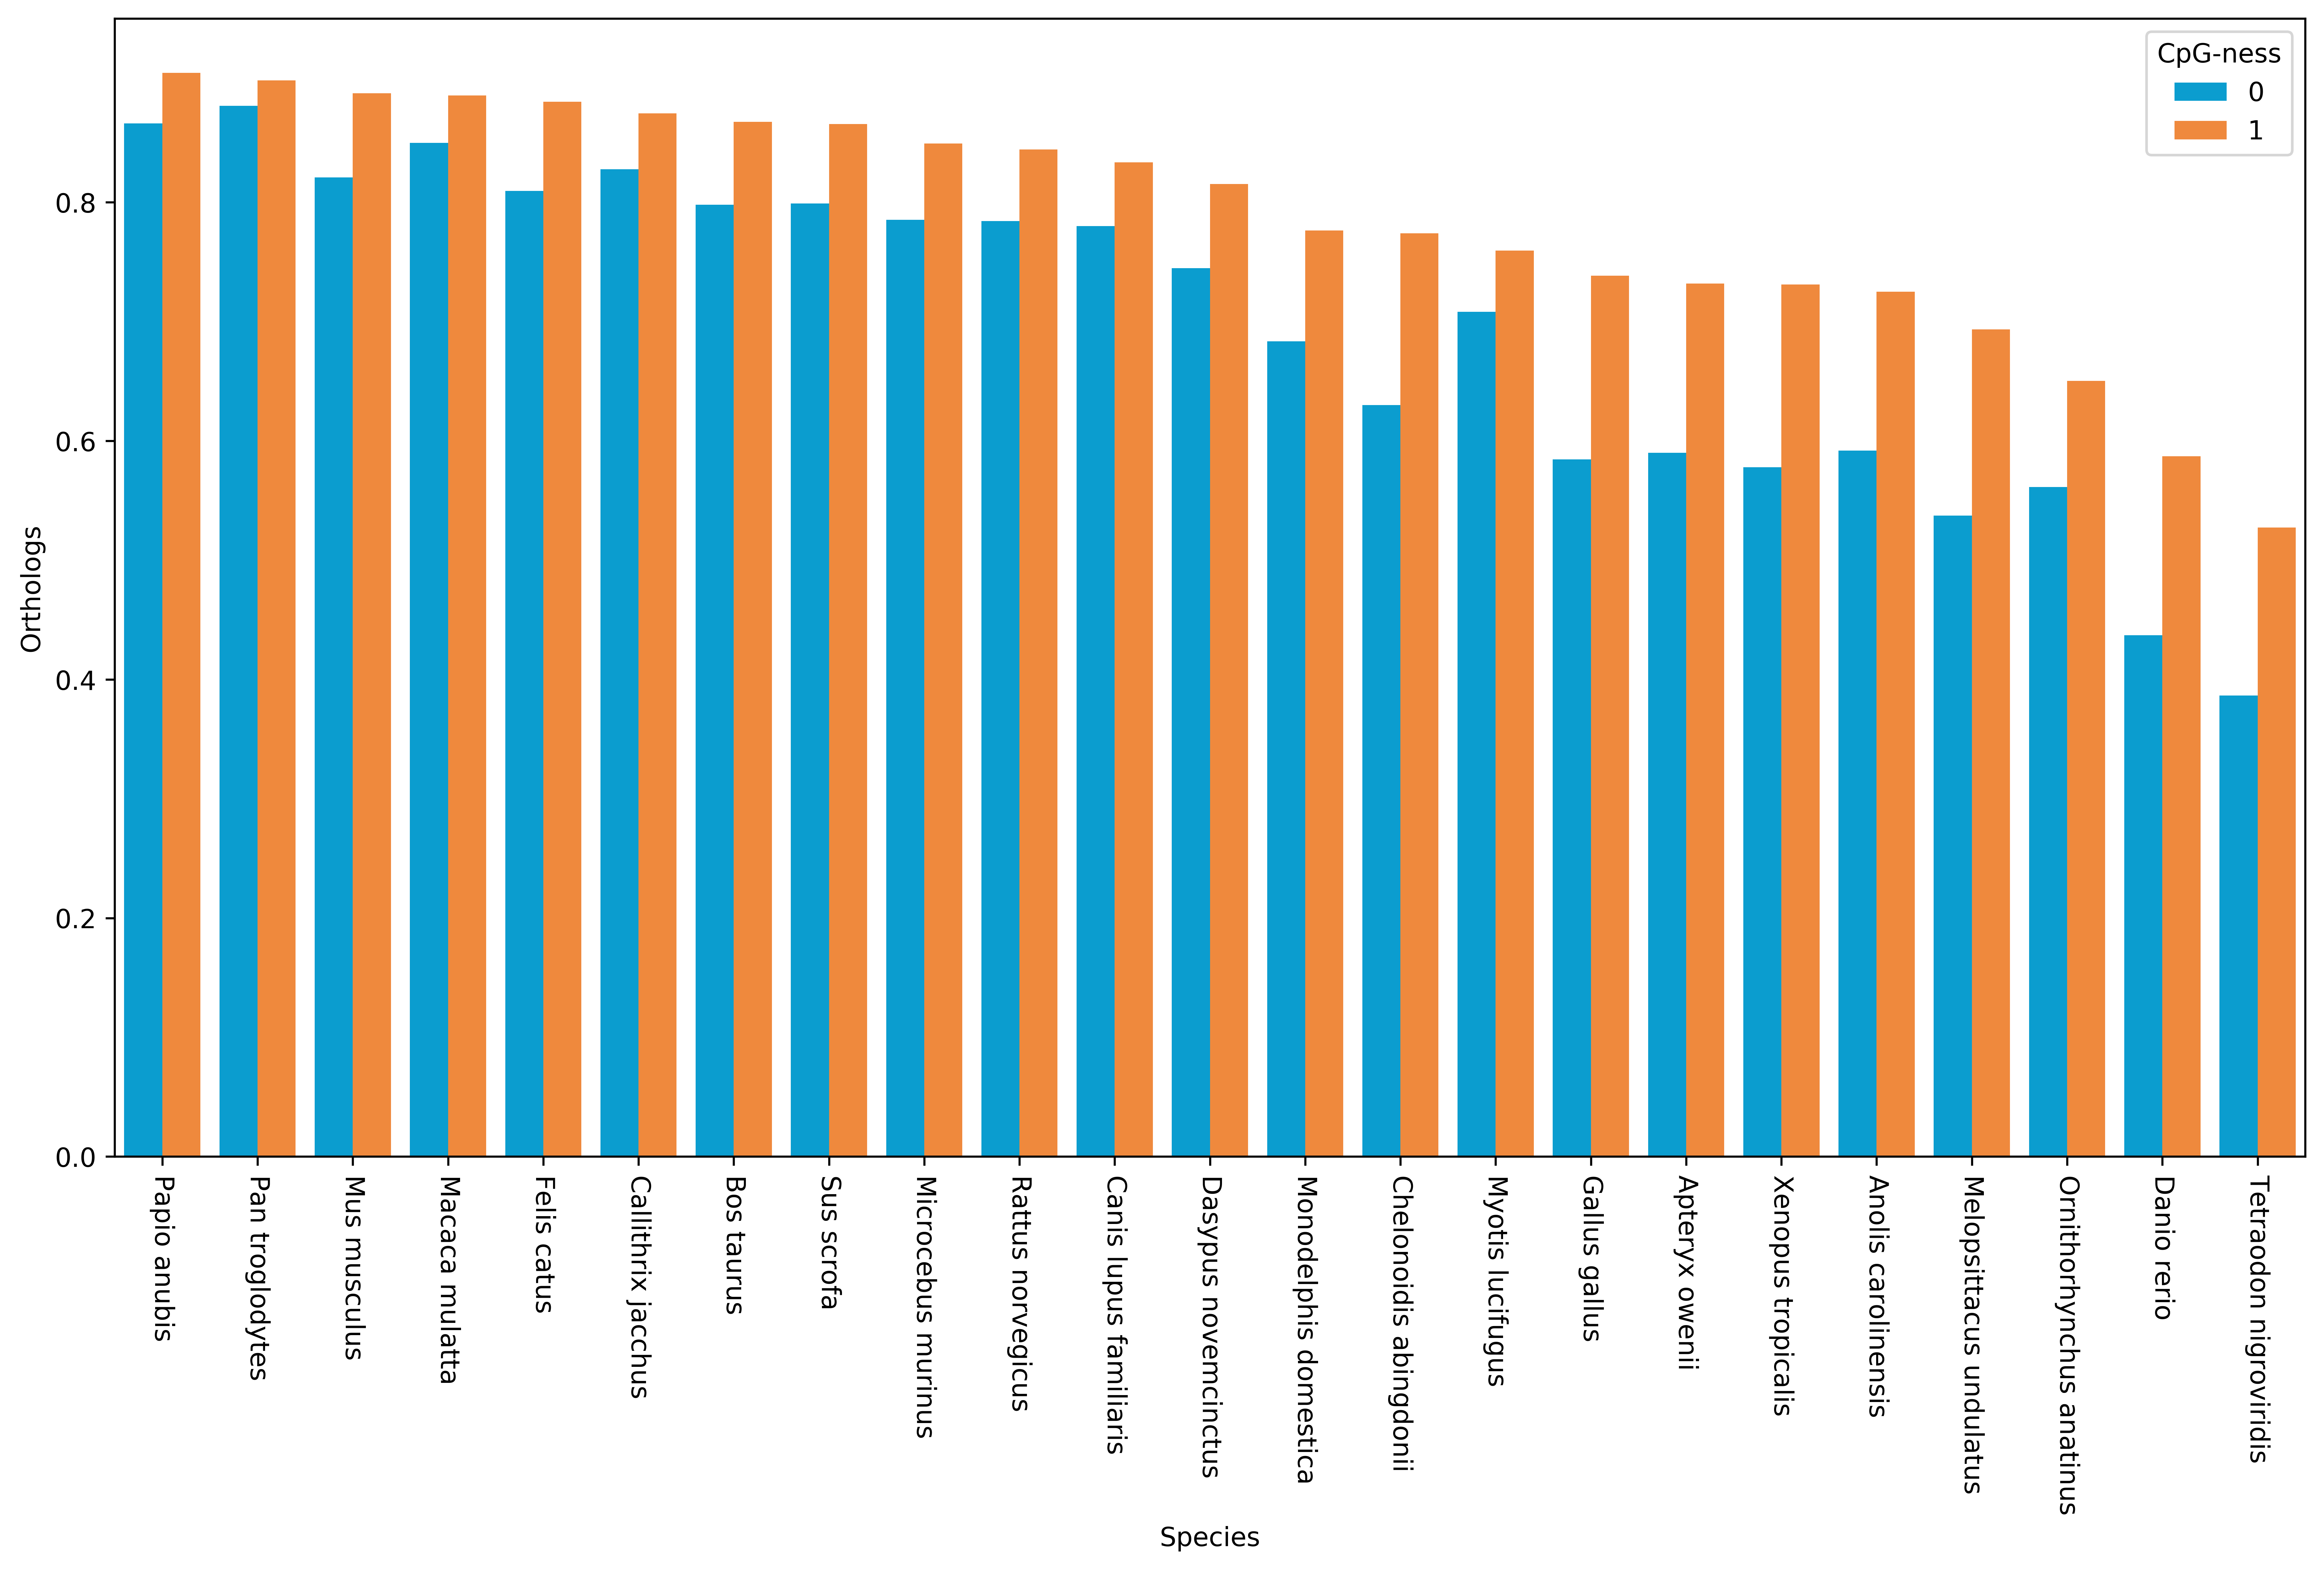

In [45]:
fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame_expr[frame_expr['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", order=['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'], saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-phylogeny-controlled-for-expression.pdf')

fig, ax = pyplot.subplots(figsize=(15,8), dpi=600)
pyplot.xticks(rotation=-90)
barplot(ax=ax, data=
        frame_expr[frame_expr['Species'].isin(['Pan troglodytes', 'Macaca mulatta', 'Papio anubis', 'Callithrix jacchus', 'Microcebus murinus', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa',
                     'Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Myotis lucifugus', 'Dasypus novemcinctus', 'Monodelphis domestica',
                     'Ornithorhynchus anatinus', 'Melopsittacus undulatus', 'Apteryx owenii', 'Gallus gallus', 'Chelonoidis abingdonii', 'Anolis carolinensis',
                     'Xenopus tropicalis', 'Tetraodon nigroviridis', 'Danio rerio'])],
        x="Species", y="Orthologs", hue="CpG-ness", saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortholog-ratio-human-vs-selected-by-ratio-controlled-for-expression.pdf')

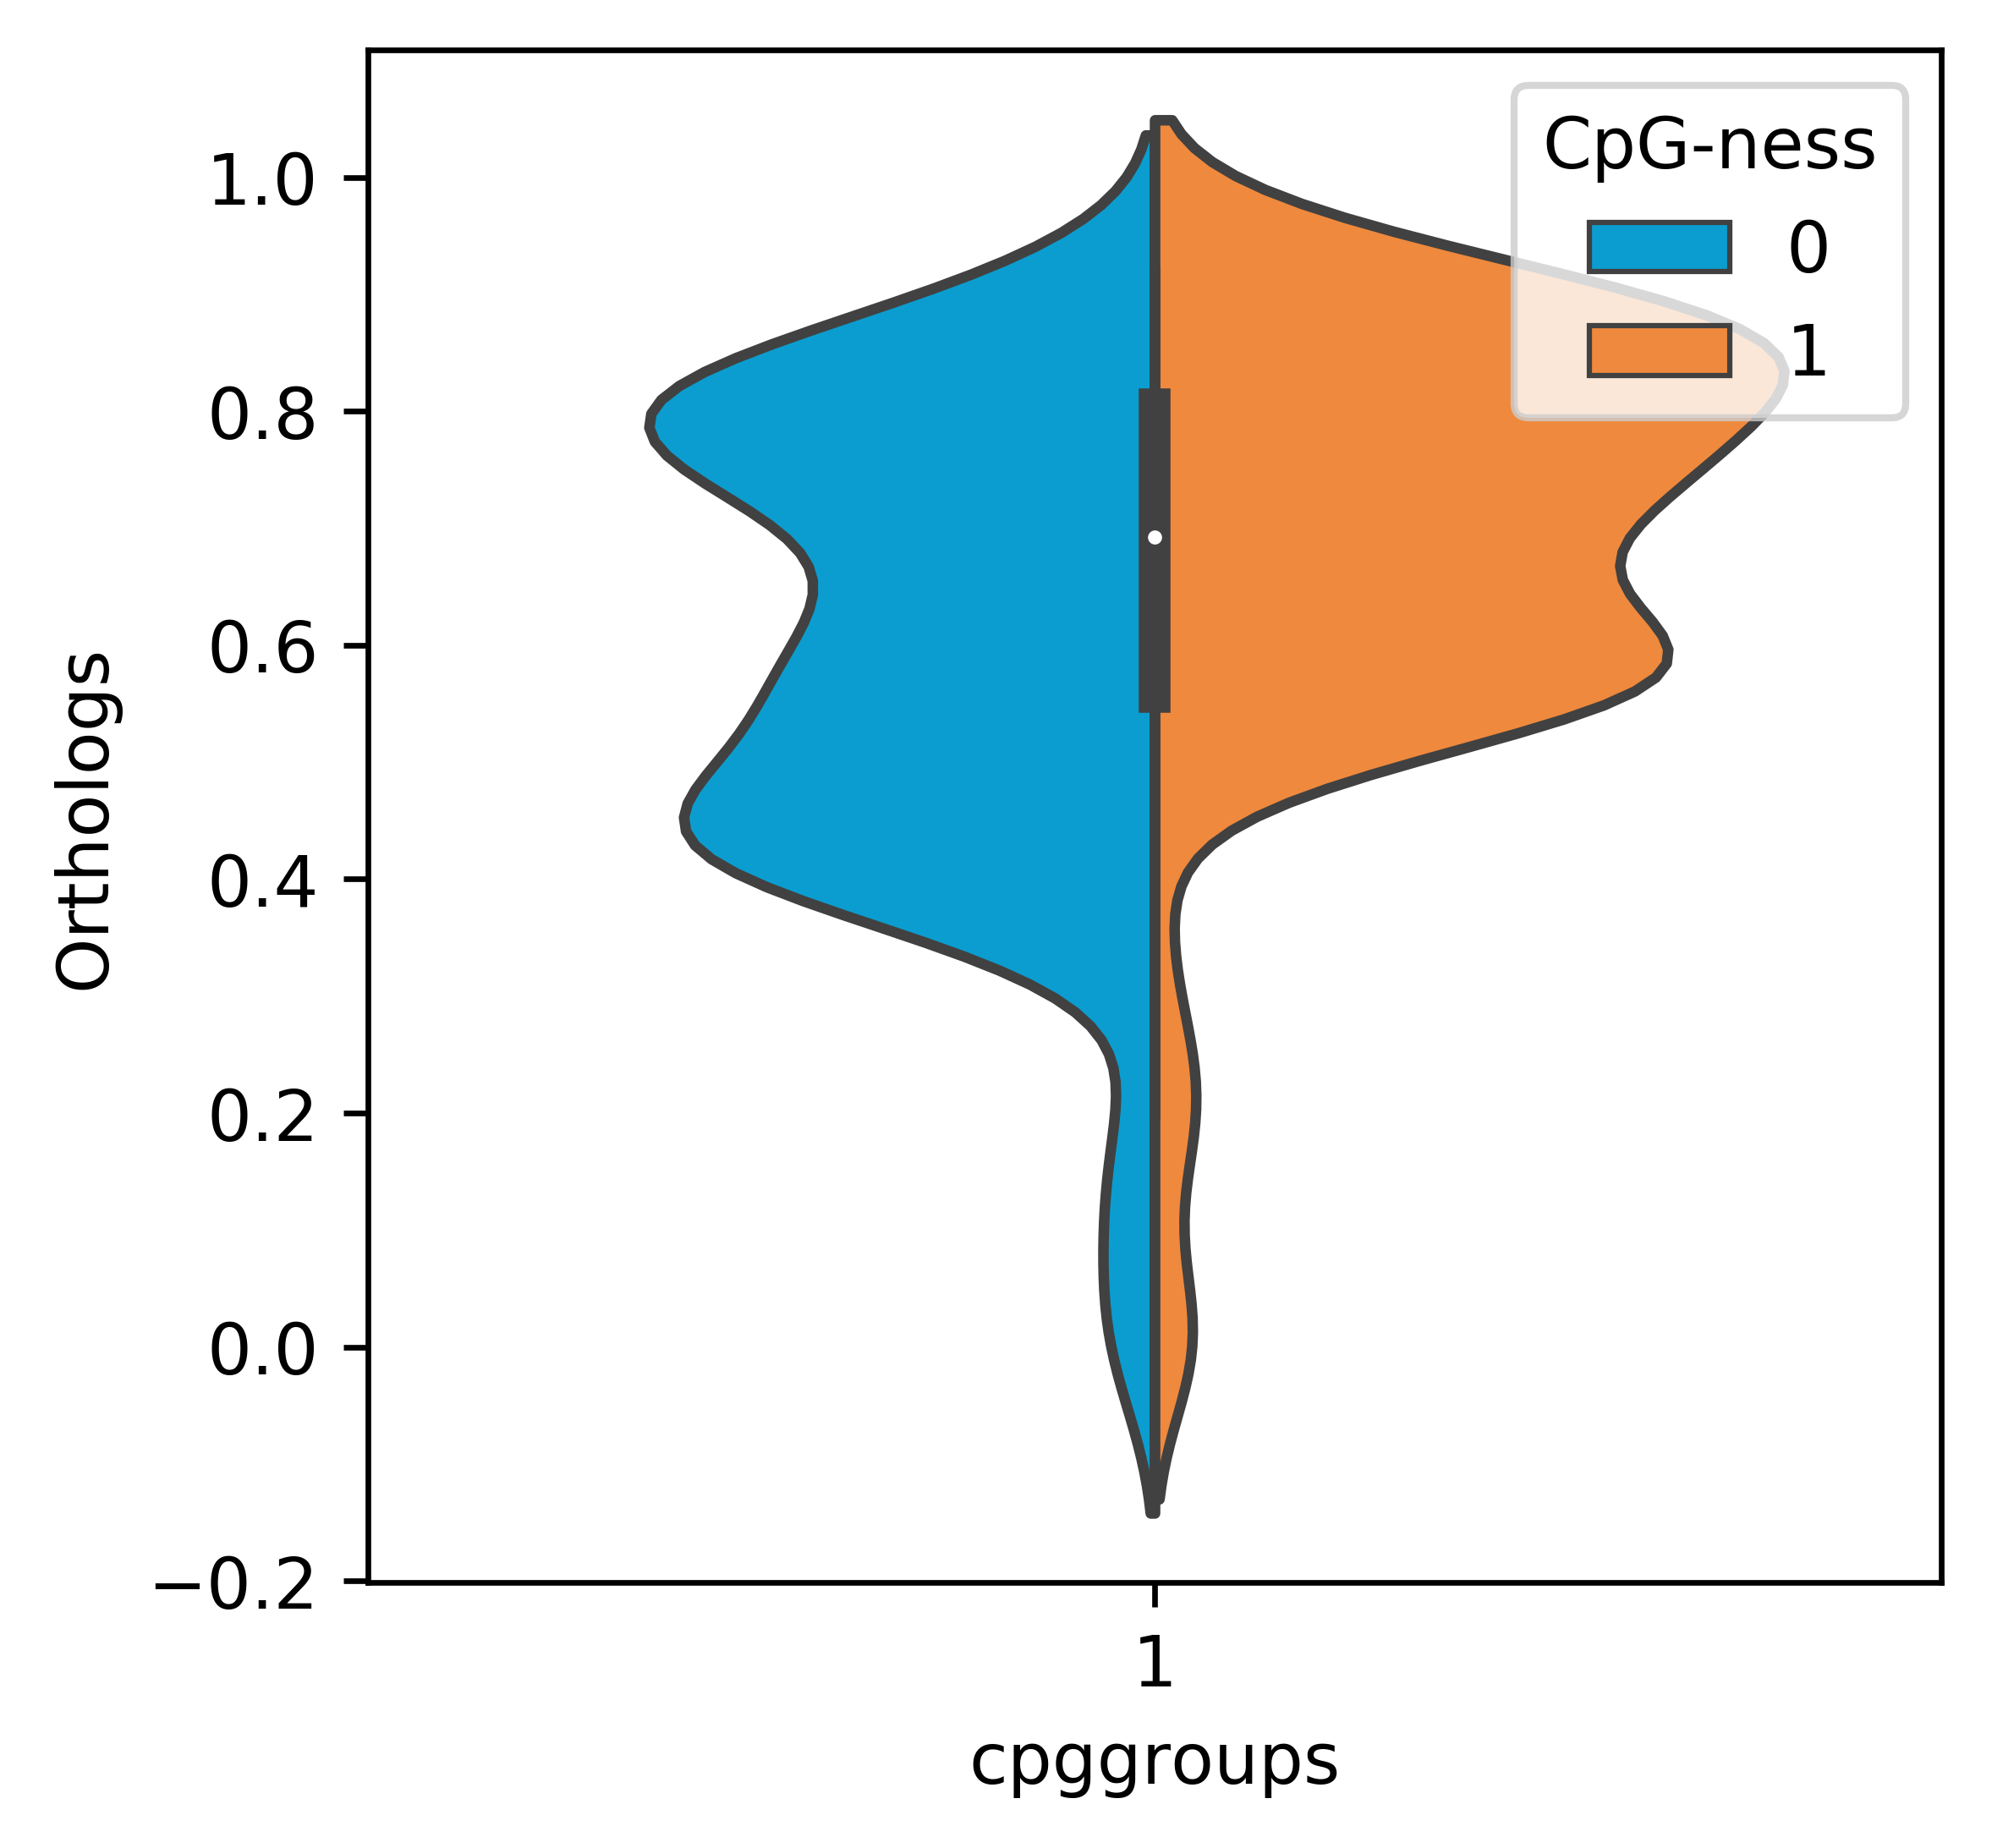

In [56]:
from seaborn import violinplot
fig,ax = pyplot.subplots(figsize=(4,4), dpi=600)
violinplot(ax=ax, data=frame_expr.assign(cpggroups=1), x="cpggroups", y="Orthologs", hue="CpG-ness", split=True, saturation=1.0, palette = ['#0B9DCF', '#EF893D'])
fig.savefig('ortho-one-to-one-species-human-by-cgi-violin-corrected-for-expression.pdf')

ERROR! Session/line number was not unique in database. History logging moved to new session 248


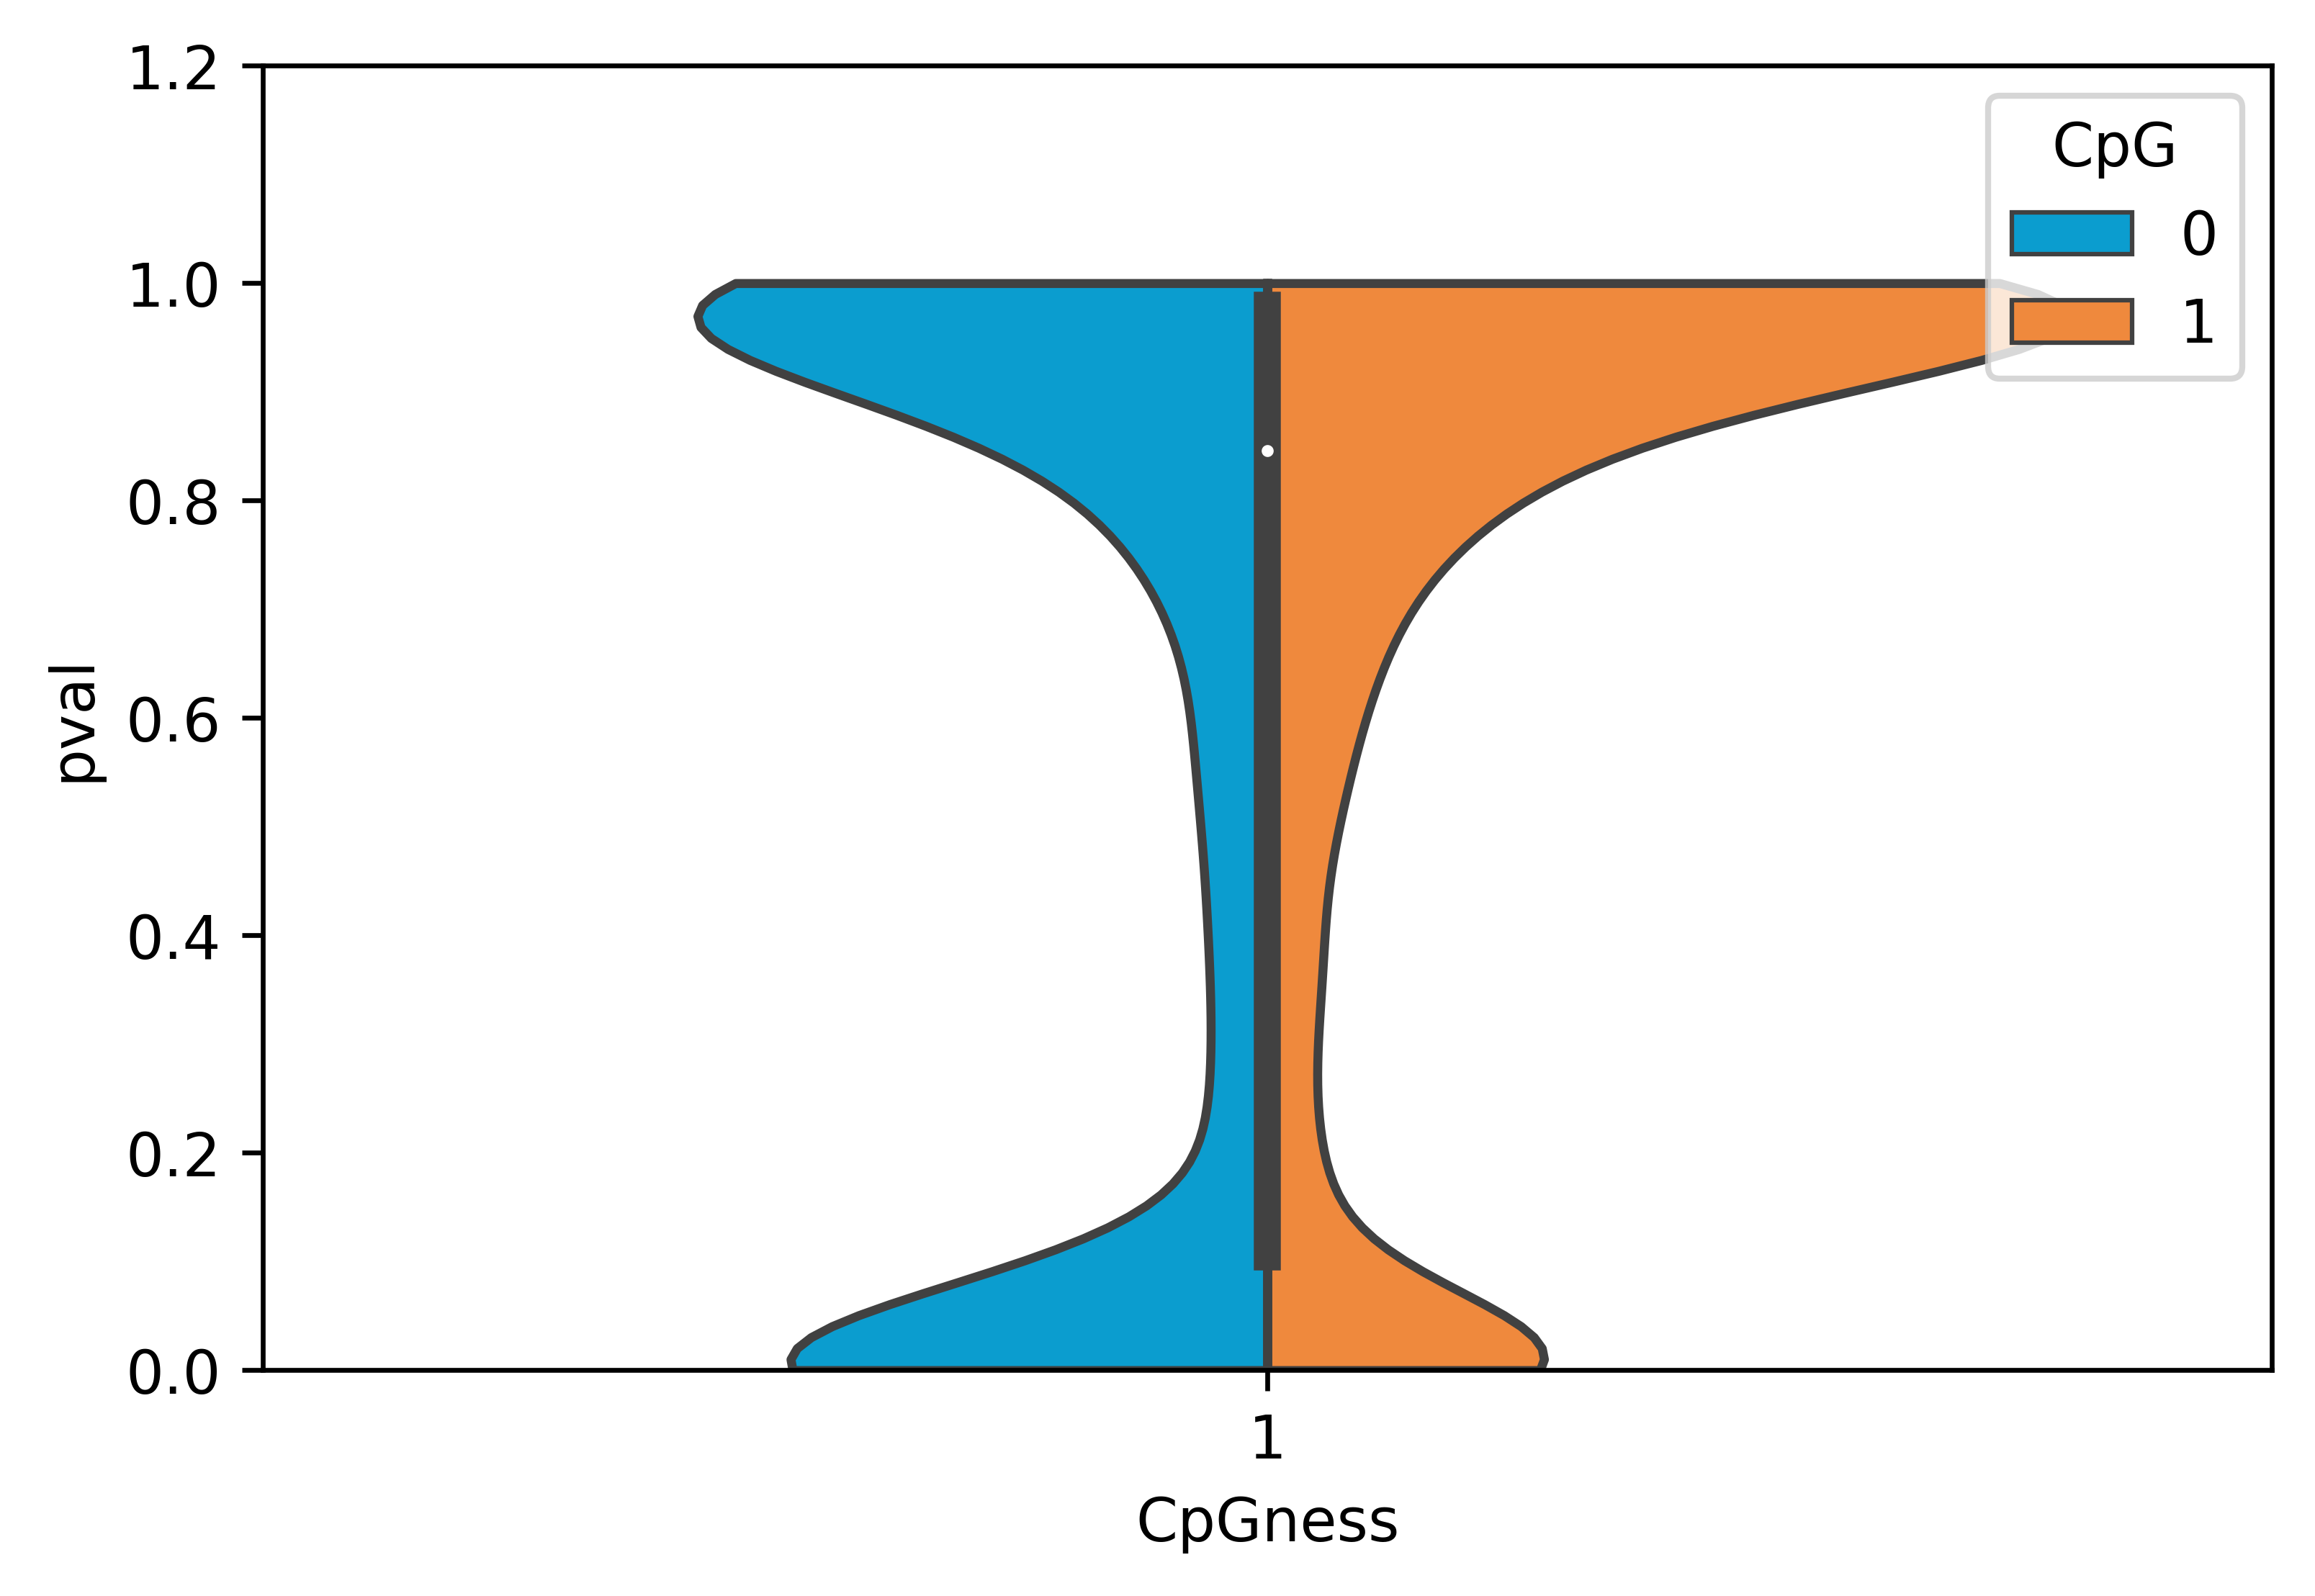

In [57]:
from matplotlib import pyplot as plt
from seaborn import violinplot
import pandas as pd
fam_pvalues = {'gene:'+v.split()[0]:float(v.split()[1]) for v in open('human-genes-p-value.txt').readlines()}
fig, ax = plt.subplots(dpi=600)
plt.ylim(0.0, 1.2)
violinplot(ax=ax, data=pd.concat((DataFrame({'pval':[fam_pvalues[g] for g in cpg_len_less if g in fam_pvalues]}).assign(CpG=0), DataFrame({'pval':[fam_pvalues[g] for g in cpg_len_full if g in fam_pvalues]}).assign(CpG=1))).assign(CpGness=1),
           x='CpGness', y='pval', hue='CpG', split=True, cut=0, saturation=1.0, palette=['#0B9DCF', '#EF893D'])
plt.savefig('human-gene-gain-and-loss-pvalue-violin-corrected-for-length.pdf')
 

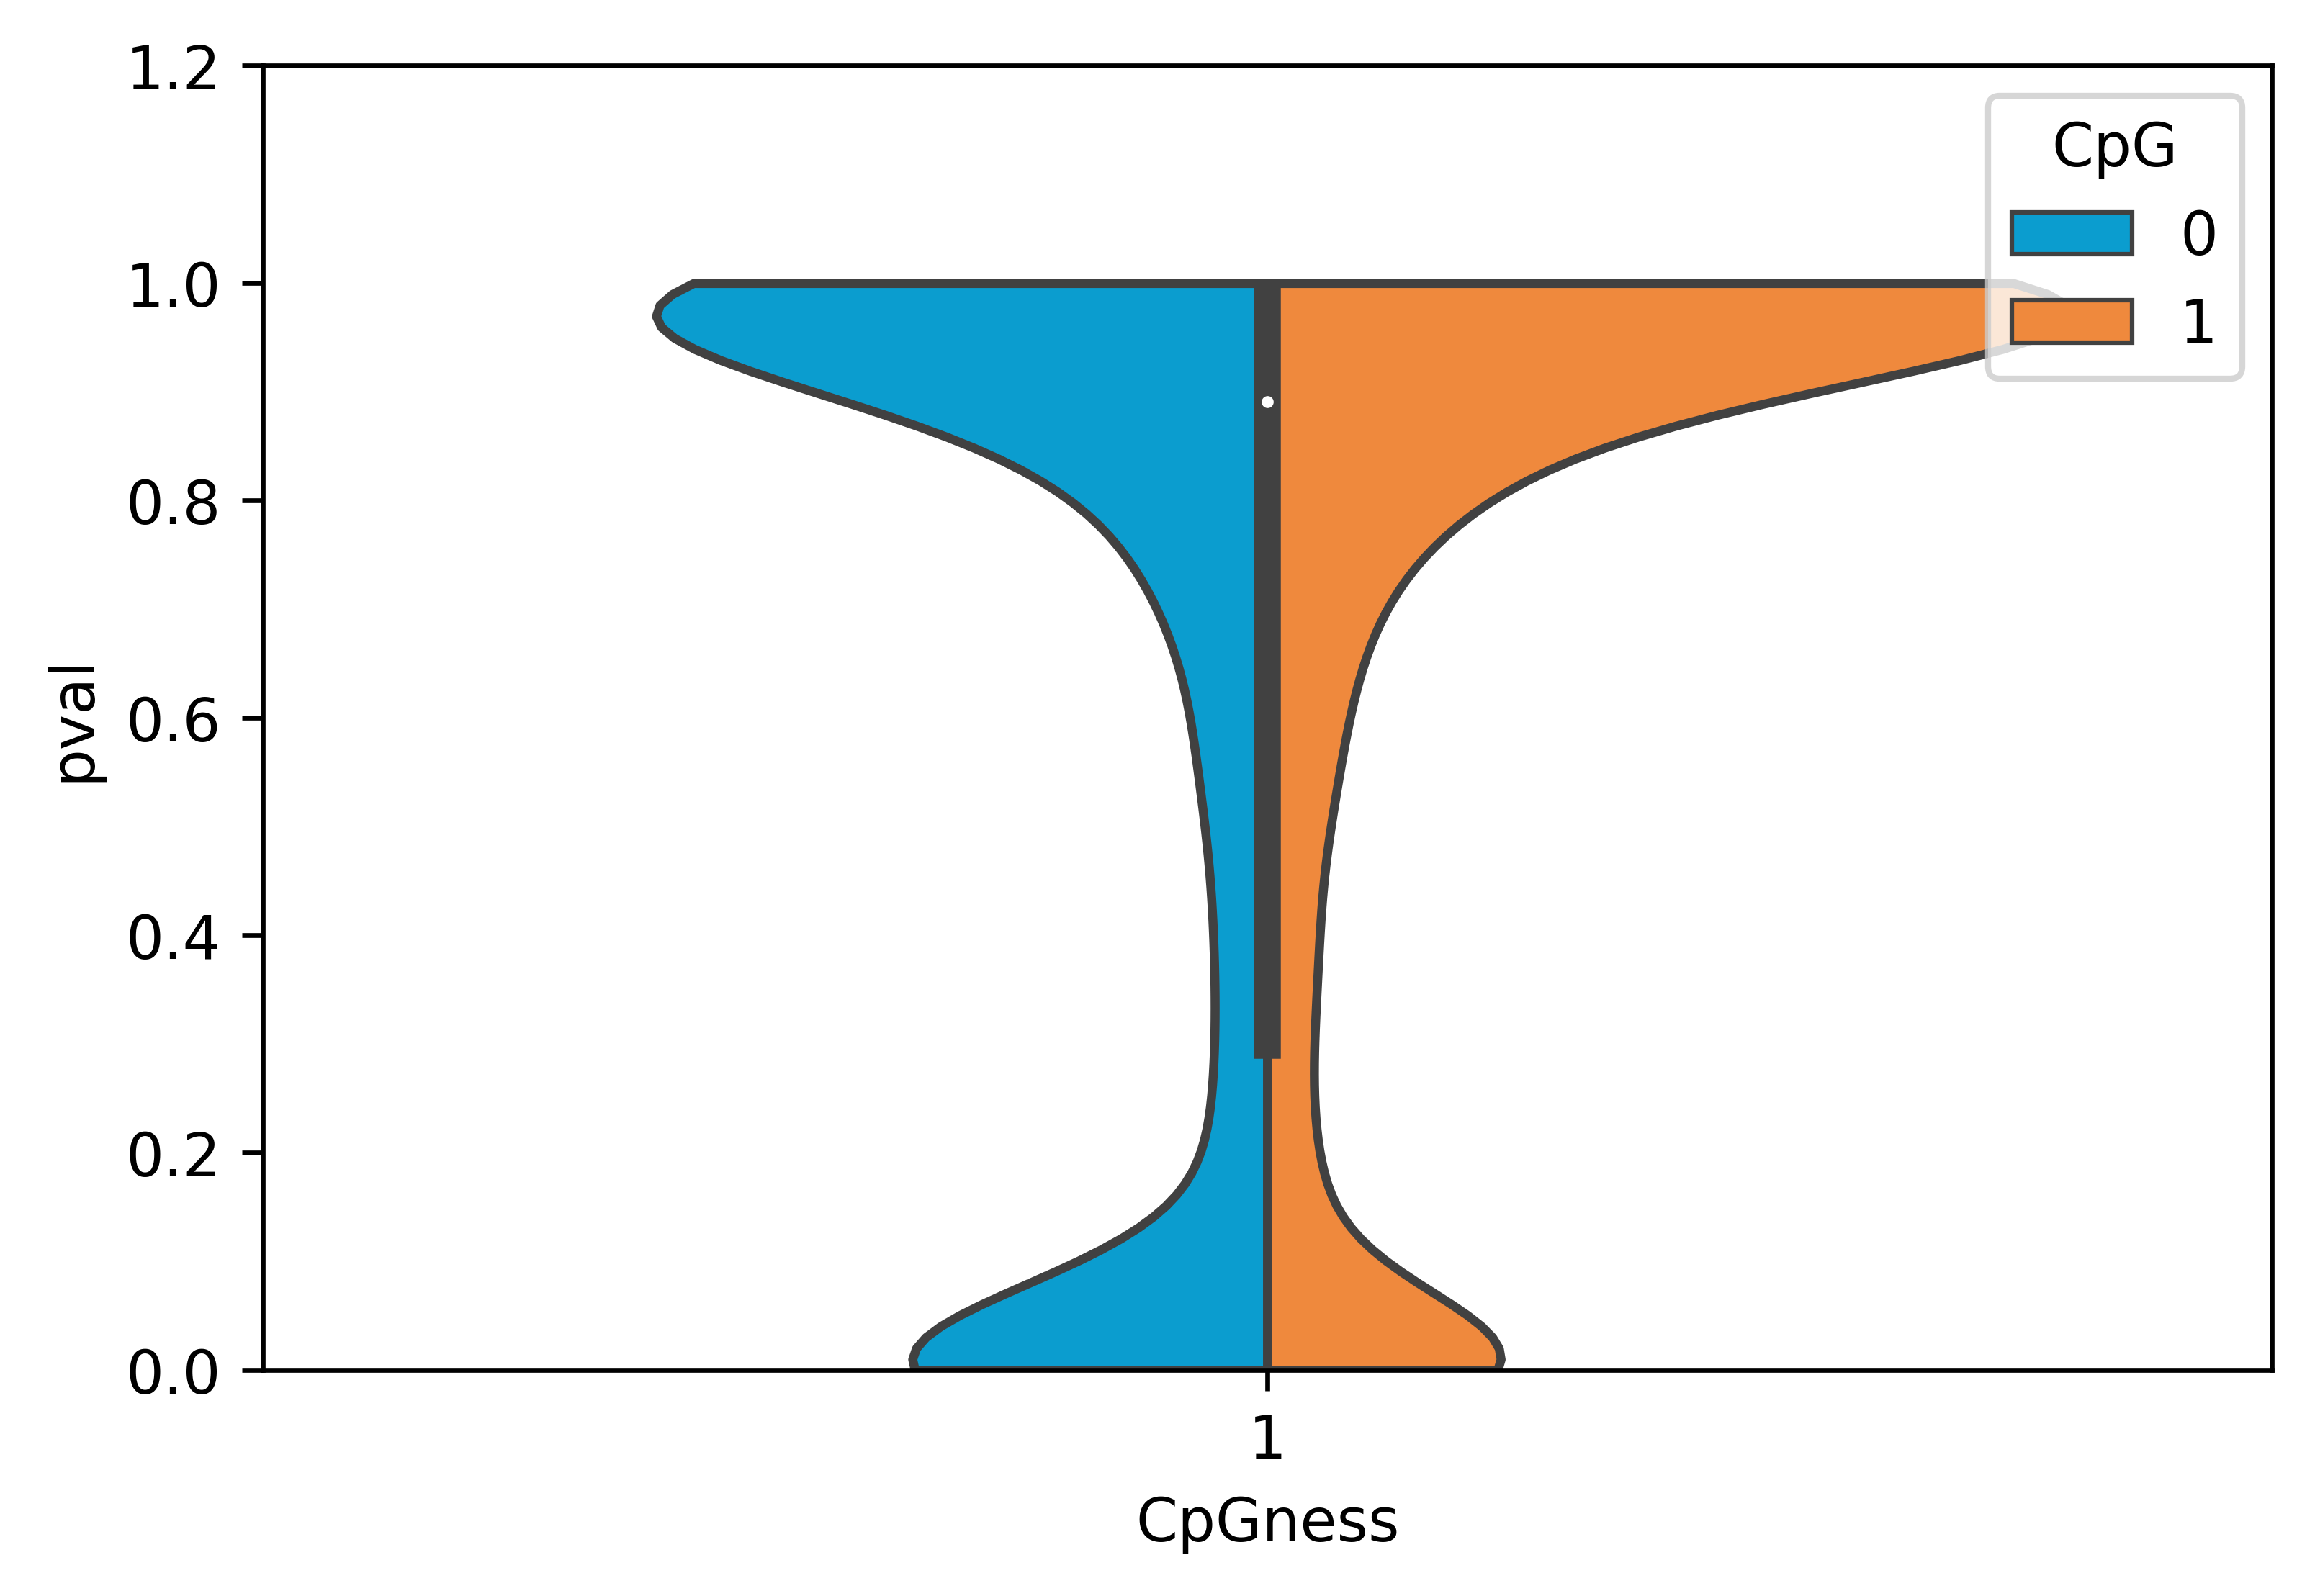

In [58]:
from matplotlib import pyplot as plt
from seaborn import violinplot
import pandas as pd
fam_pvalues = {'gene:'+v.split()[0]:float(v.split()[1]) for v in open('human-genes-p-value.txt').readlines()}
fig, ax = plt.subplots(dpi=600)
plt.ylim(0.0, 1.2)
violinplot(ax=ax, data=pd.concat((DataFrame({'pval':[fam_pvalues[g] for g in cpg_expr_less if g in fam_pvalues]}).assign(CpG=0), DataFrame({'pval':[fam_pvalues[g] for g in cpg_expr_full if g in fam_pvalues]}).assign(CpG=1))).assign(CpGness=1),
           x='CpGness', y='pval', hue='CpG', split=True, cut=0, saturation=1.0, palette=['#0B9DCF', '#EF893D'])
plt.savefig('human-gene-gain-and-loss-pvalue-violin-corrected-for-expression.pdf')
 

In [60]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney on -300+100, 50%%, corrected for length:  %s'%str(mannwhitneyu([fam_pvalues[g] for g in cpg_len_less if g in fam_pvalues], [fam_pvalues[g] for g in cpg_len_full if g in fam_pvalues], alternative='less')))
print('Mann-Whitney on -300+100: 50%%, corrected for expression %s'%str(mannwhitneyu([fam_pvalues[g] for g in cpg_expr_less if g in fam_pvalues], [fam_pvalues[g] for g in cpg_expr_full if g in fam_pvalues], alternative='less')))

Mann-Whitney on -300+100, 50%, corrected for length:  MannwhitneyuResult(statistic=22996132.0, pvalue=5.187847755573447e-72)
Mann-Whitney on -300+100: 50%, corrected for expression MannwhitneyuResult(statistic=18798665.5, pvalue=1.5364624440312148e-33)
